In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, log_loss)
from sklearn.ensemble import (RandomForestRegressor, RandomForestClassifier)
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

# Data wrangling
Importing data, inspecting it and merging it into one data frame.

In [ ]:
# Load the dataset and exame the structure of the data
# Load the dataset
lpj_guess_data = pd.read_csv('LPJ-GUESS_output_BERN1.csv')

# Display the first few rows of the dataset (if neccesary)
print(lpj_guess_data.head())

# Get information about the dataset
print(lpj_guess_data.info())

      Lon    Lat    NPP  SoilR  MaxBiomeCmax  MaxBiomeLAI   VegC  LitterC  \
0   39.75  -1.25  0.429  0.390         0.449       1.9821  1.225    0.758   
1  150.25 -34.25  0.554  0.451         6.883       3.3174  6.953    3.221   
2  -63.75  82.75  0.000  0.000         0.000       0.0000  0.000    0.003   
3   59.25  30.75  0.043  0.042         0.090       0.2146  0.127    0.084   
4   24.25  27.75  0.000  0.000         0.000       0.0000  0.000    0.000   

    SoilC  Biome_Cmax  Biome_LAI  Biome_obs  
0   5.941           8         12         12  
1  10.566           7          7          6  
2   0.002          13         13         17  
3   0.543           7         11         14  
4   0.000          13         13         17  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59191 entries, 0 to 59190
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lon           59191 non-null  float64
 1   Lat           5919

Combining the ecosystem variables and the climate variables, and setting up correlation matrix.

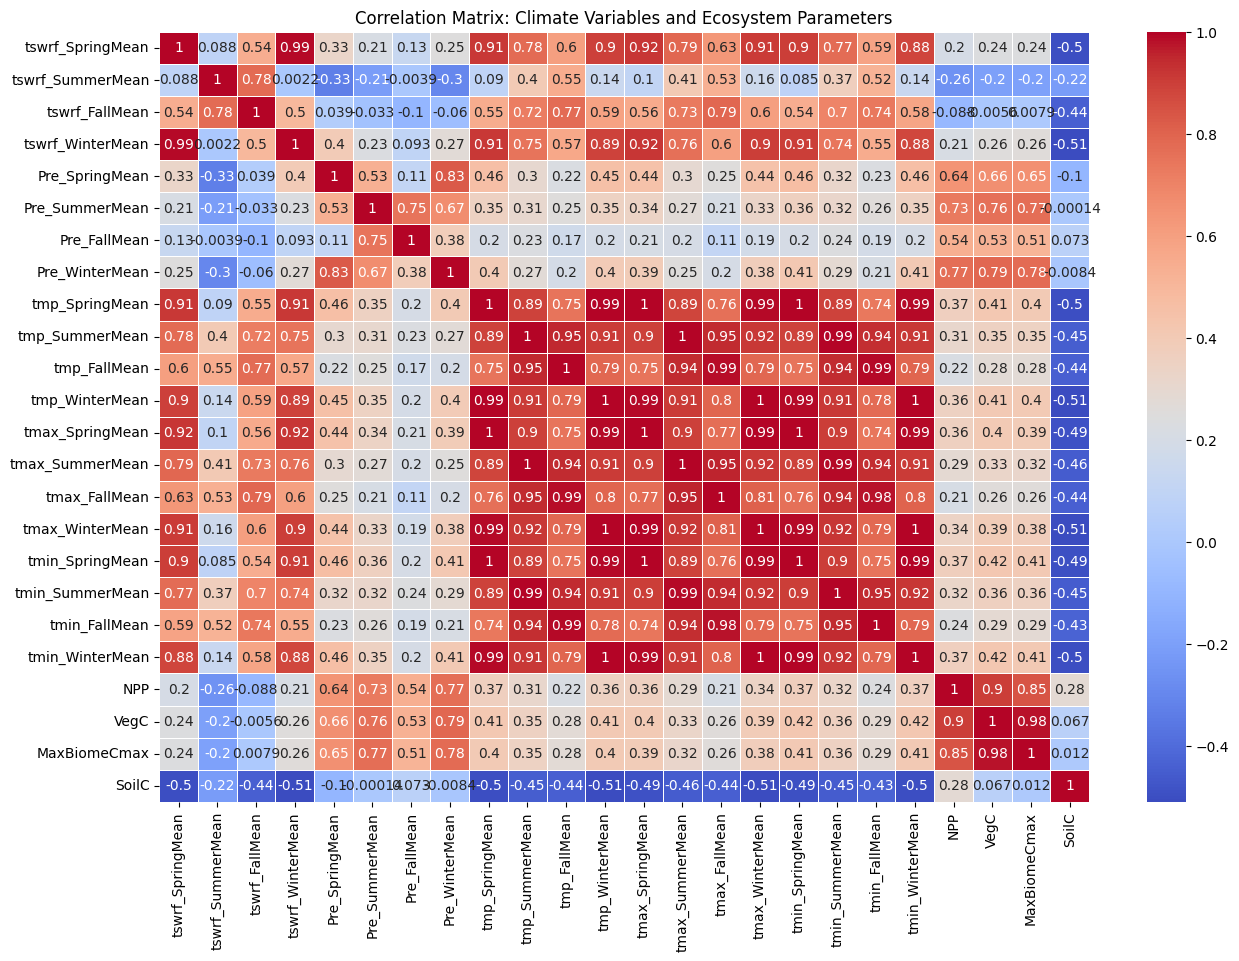

In [ ]:
data = pd.read_csv('data_index_2.csv')
# Define the climate variables with their appropriate suffixes
climate_vars = [
    'tswrf_SpringMean', 'tswrf_SummerMean', 'tswrf_FallMean', 'tswrf_WinterMean',
    'Pre_SpringMean', 'Pre_SummerMean', 'Pre_FallMean', 'Pre_WinterMean',
    'tmp_SpringMean', 'tmp_SummerMean', 'tmp_FallMean', 'tmp_WinterMean',
    'tmax_SpringMean', 'tmax_SummerMean', 'tmax_FallMean', 'tmax_WinterMean',
    'tmin_SpringMean', 'tmin_SummerMean', 'tmin_FallMean', 'tmin_WinterMean'
]

# Define the ecosystem variables
ecosystem_vars = ['NPP', 'VegC', 'MaxBiomeCmax', 'SoilC']

# Combine the selected climate and ecosystem variables
selected_columns = climate_vars + ecosystem_vars

# Calculate the correlation matrix
correlation_matrix = data[selected_columns].corr()

# Plot the correlation heatmap
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Climate Variables and Ecosystem Parameters')
plt.show()


Filtering out and displaying variable paris with correlation higher than 0.5.

Climate variables highly correlated with ecosystem variables (correlation > 0.7):
    Climate_Variable Ecosystem_Variable  Correlation
0   tswrf_SpringMean              SoilC     0.502643
1   tswrf_WinterMean              SoilC     0.506759
2     Pre_SpringMean                NPP     0.643447
3     Pre_SpringMean               VegC     0.660770
4     Pre_SpringMean       MaxBiomeCmax     0.654055
5     Pre_SummerMean                NPP     0.730547
6     Pre_SummerMean               VegC     0.760559
7     Pre_SummerMean       MaxBiomeCmax     0.765700
8       Pre_FallMean                NPP     0.538435
9       Pre_FallMean               VegC     0.527041
10      Pre_FallMean       MaxBiomeCmax     0.514609
11    Pre_WinterMean                NPP     0.767854
12    Pre_WinterMean               VegC     0.791516
13    Pre_WinterMean       MaxBiomeCmax     0.780625
14    tmp_WinterMean              SoilC     0.508315
15   tmax_WinterMean              SoilC     0.508927


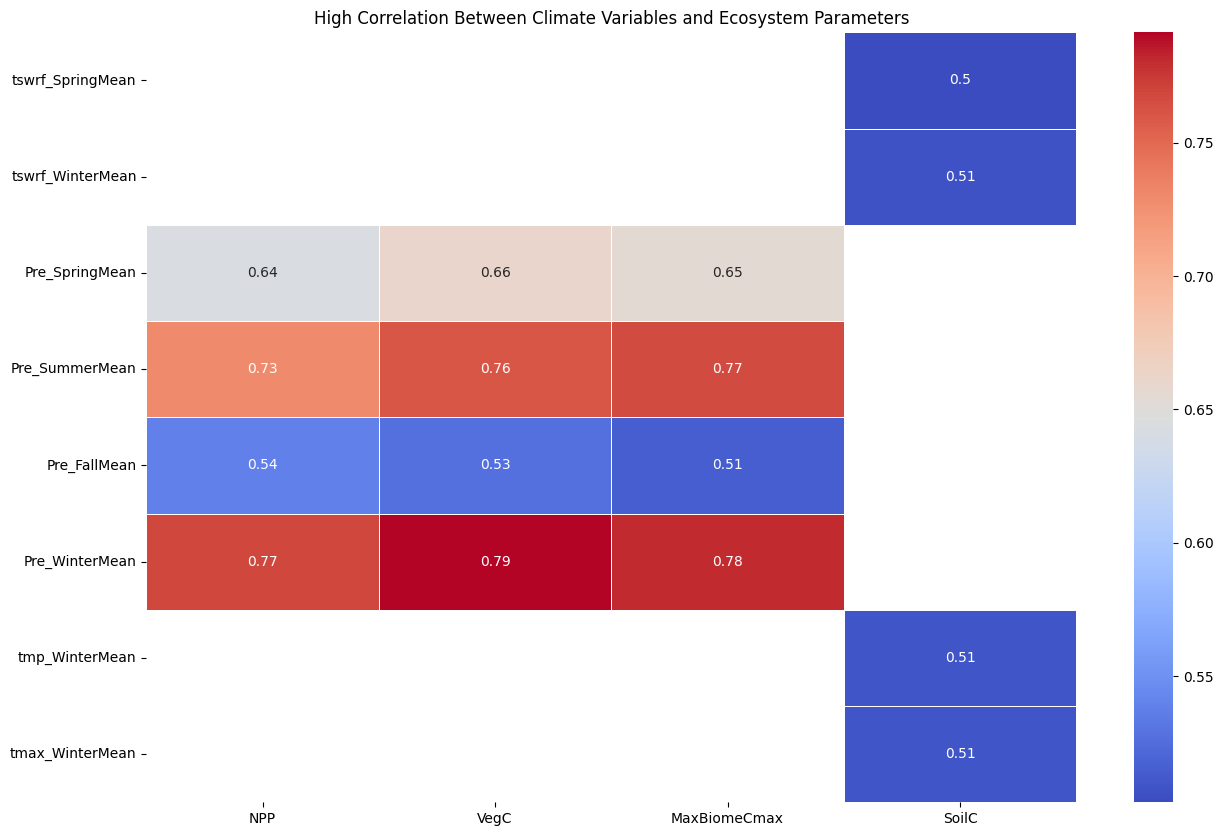

In [ ]:
# Get the absolute values of the correlation matrix
abs_corr_matrix = correlation_matrix.abs()

# Filter only the correlations between climate_vars and ecosystem_vars
# This will exclude correlations within climate variables and within ecosystem variables
high_corr_pairs = abs_corr_matrix.loc[climate_vars, ecosystem_vars]

# Filter for absolute correlations greater than 0.5
threshold = 0.5
high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold].dropna(how='all')

# Reshape the dataframe to show feature pairs
high_corr_features = high_corr_pairs.stack().reset_index()
high_corr_features.columns = ['Climate_Variable', 'Ecosystem_Variable', 'Correlation']

# Display the climate-ecosystem feature pairs with high correlation
print("Climate variables highly correlated with ecosystem variables (correlation > 0.7):")
print(high_corr_features)

# Optional: If you want to plot the correlation heatmap again
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_pairs, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('High Correlation Between Climate Variables and Ecosystem Parameters')
plt.show()

Plotting histograms of select facrtors.

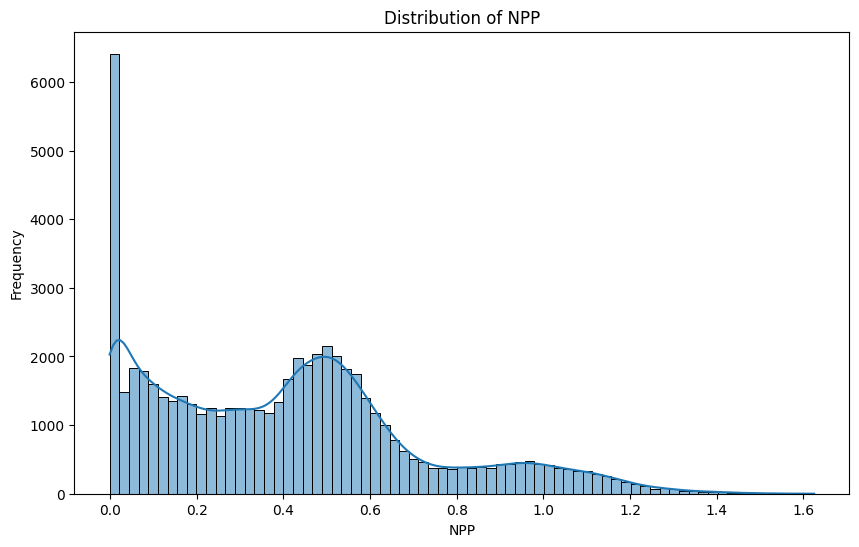

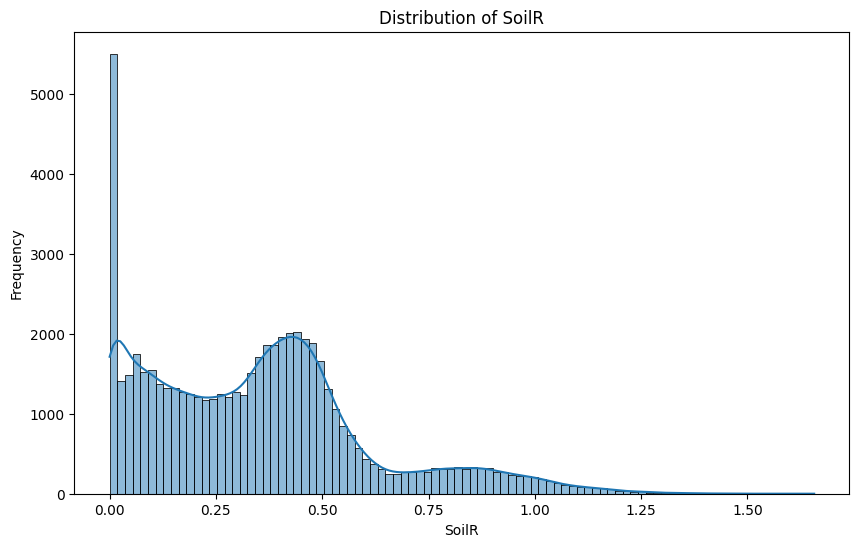

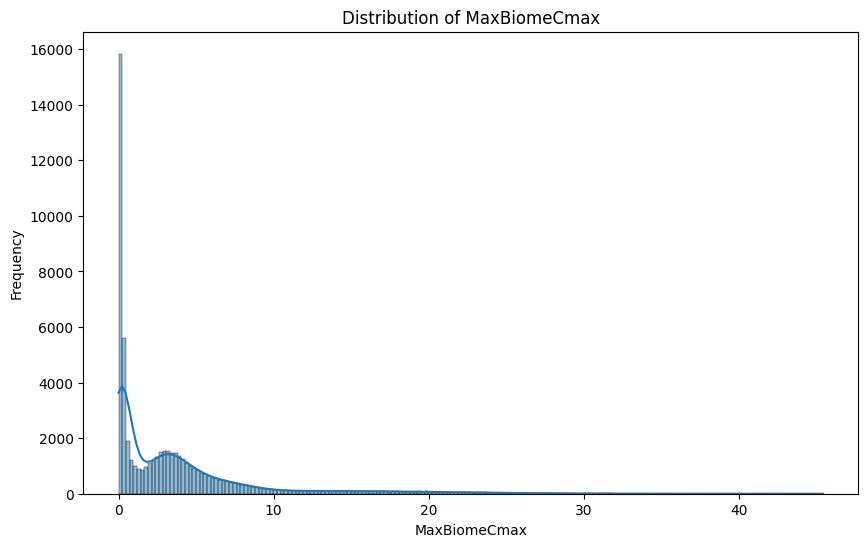

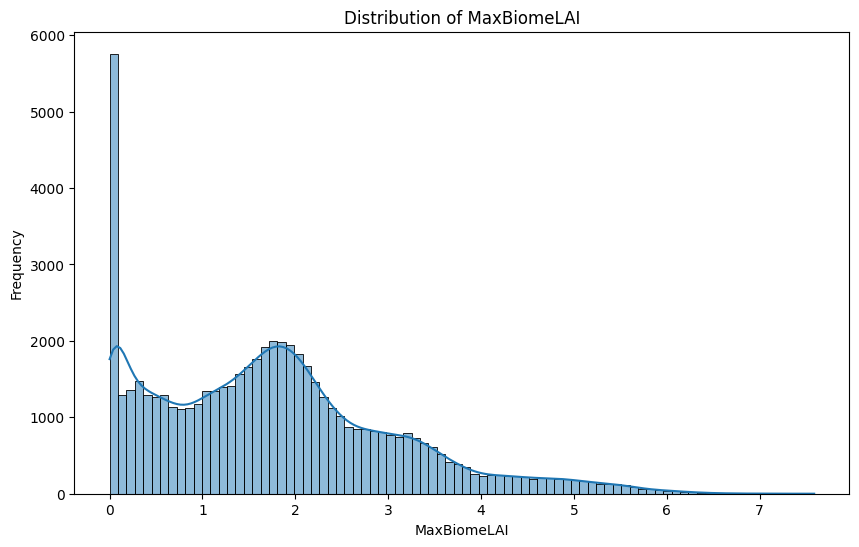

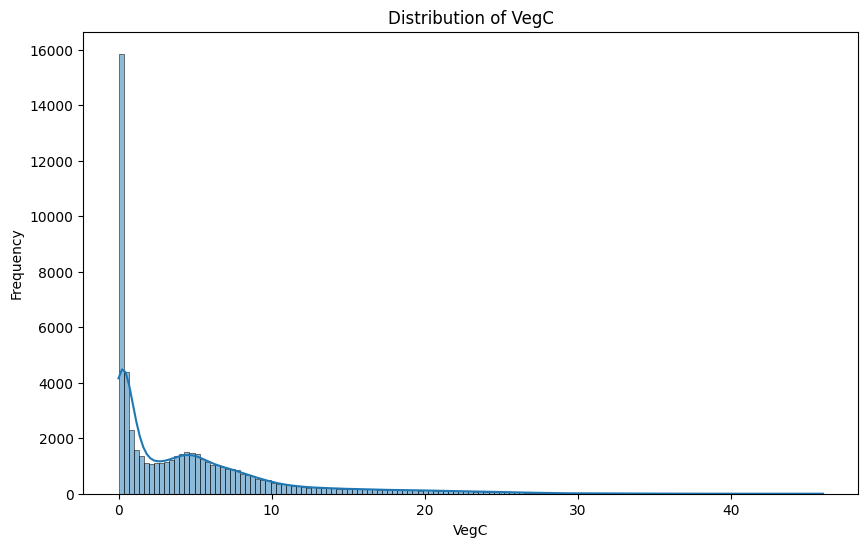

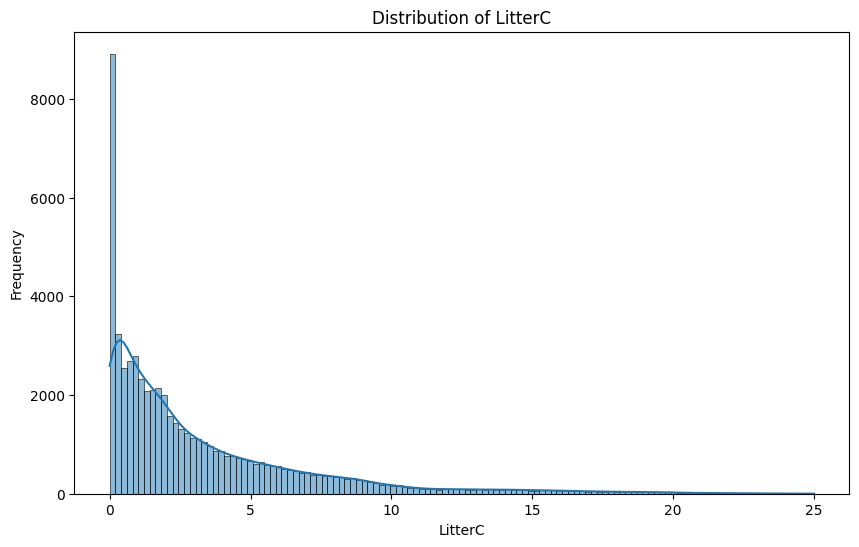

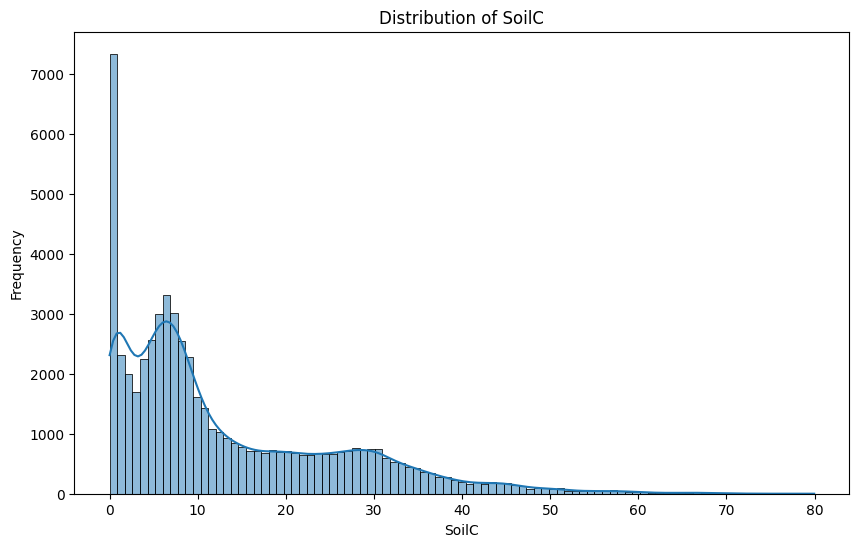

In [ ]:
import seaborn as sns

# List of important factors to visualize
factors = ['NPP', 'SoilR', 'MaxBiomeCmax', 'MaxBiomeLAI', 'VegC', 'LitterC', 'SoilC']

# Loop through each factor and plot the distribution
for factor in factors:
    plt.figure(figsize=(10, 6))
    sns.histplot(lpj_guess_data[factor], kde=True)
    plt.title(f'Distribution of {factor}')
    plt.xlabel(factor)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Summary statistics for the important factors
summary_stats = lpj_guess_data[factors].describe()
print(summary_stats)

                NPP         SoilR  MaxBiomeCmax   MaxBiomeLAI          VegC  \
count  59191.000000  59191.000000  59191.000000  59191.000000  59191.000000   
mean       0.406849      0.347512      3.738343      1.763624      4.690384   
std        0.311656      0.261882      5.188418      1.300309      5.792791   
min       -0.001000      0.000000      0.000000      0.000000      0.000000   
25%        0.136500      0.129000      0.208000      0.715750      0.284000   
50%        0.399000      0.340000      2.196000      1.667100      2.878000   
75%        0.572000      0.480000      4.847000      2.479050      6.767000   
max        1.625000      1.657000     45.403000      7.587400     46.000000   

            LitterC         SoilC  
count  59191.000000  59191.000000  
mean       3.275625     13.269926  
std        3.814867     12.701029  
min        0.000000      0.000000  
25%        0.618000      4.014000  
50%        1.903000      8.454000  
75%        4.611000     20.826000  


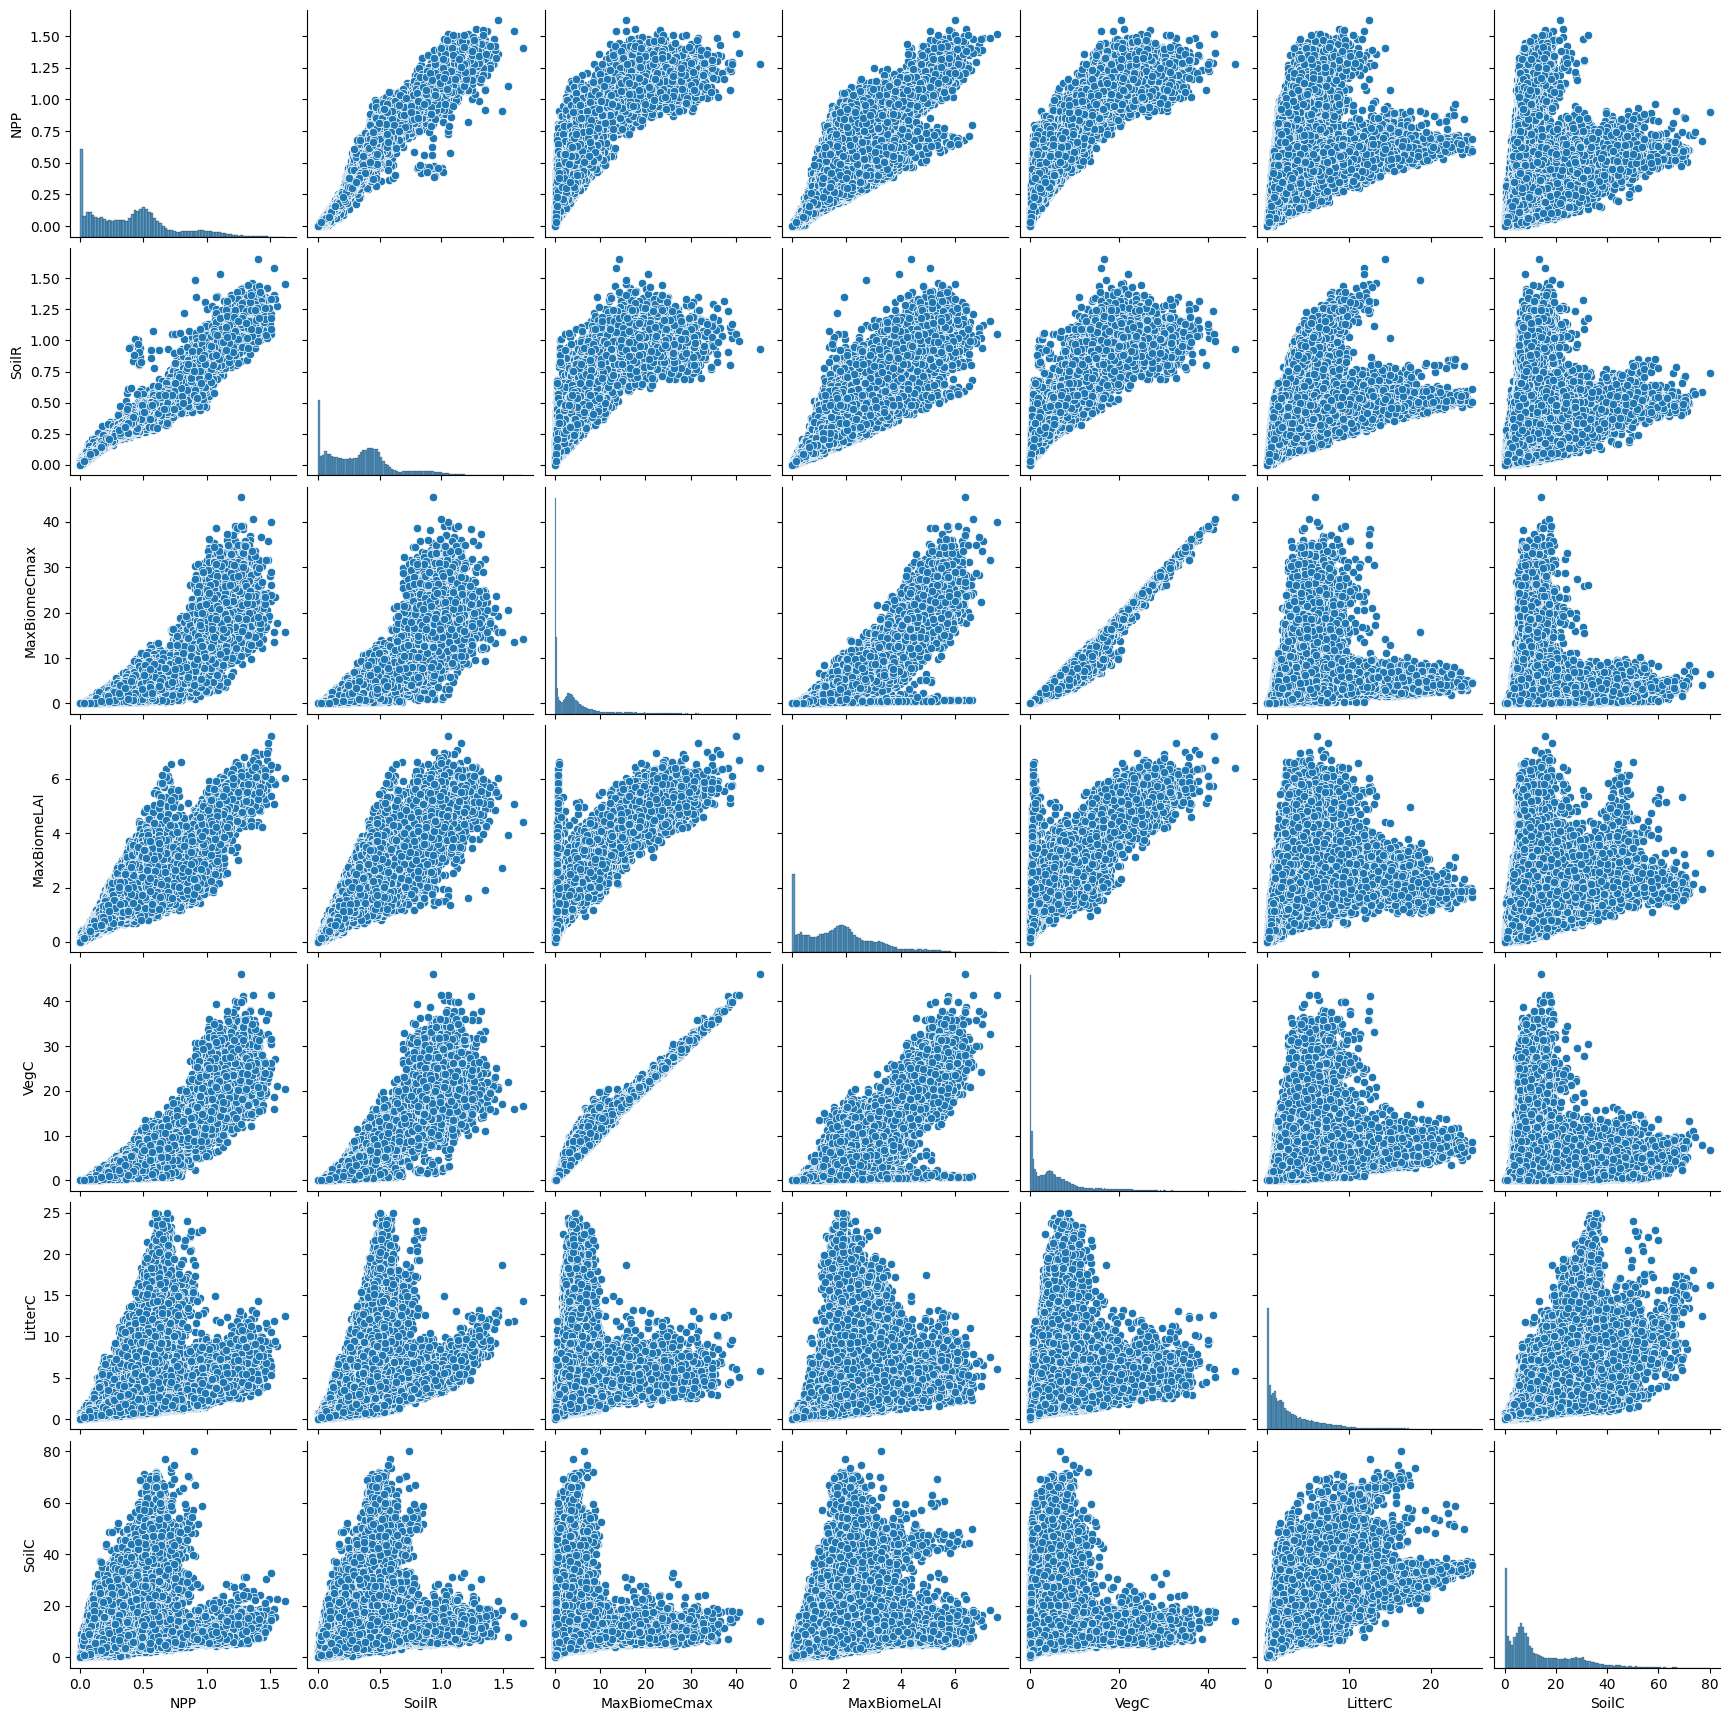

In [ ]:
# Pairwise scatter plots between key factors
sns.pairplot(lpj_guess_data[factors])
plt.show()

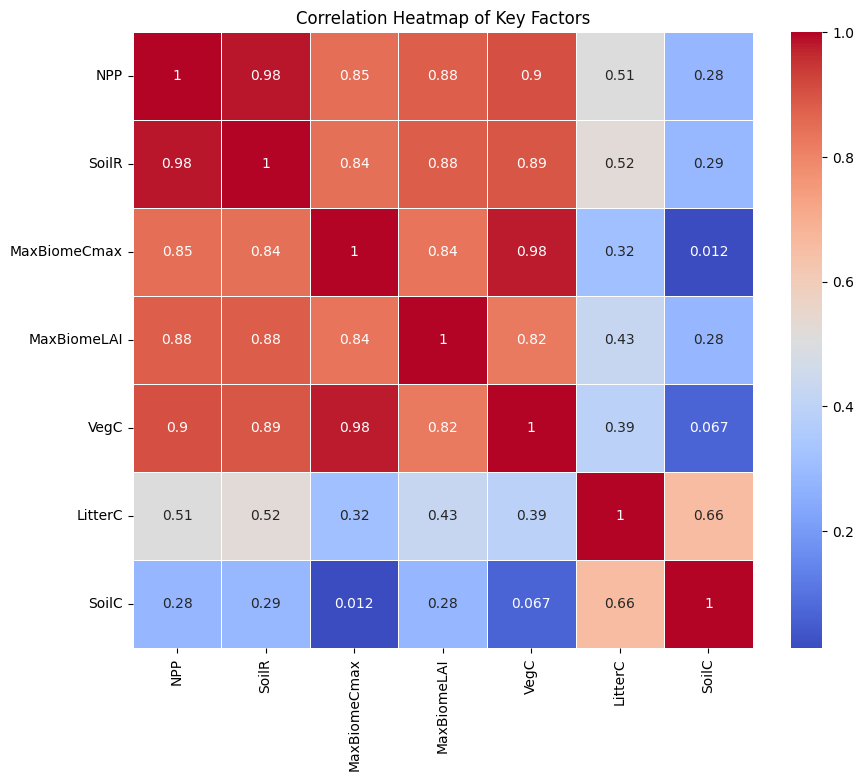

In [ ]:
# Correlation matrix
corr_matrix = lpj_guess_data[factors].corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Factors')
plt.show()

       Pre_SpringMean  Pre_SummerMean  Pre_FallMean  Pre_WinterMean
count    59191.000000    59191.000000  59191.000000    59191.000000
mean         1.814458        1.972350      2.326383        1.825684
std          2.476071        2.167369      2.557972        2.063016
min          0.000000        0.000990      0.000000        0.000000
25%          0.371690        0.637915      0.697455        0.525475
50%          0.798180        1.312600      1.710600        1.098700
75%          2.071200        2.312350      2.833900        2.274550
max         19.330000       27.805000     34.198000       24.376000


<ipython-input-9-8a7fa7e10ee5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Season', y='Precipitation', data=data_long, order=season_order, palette=palette)


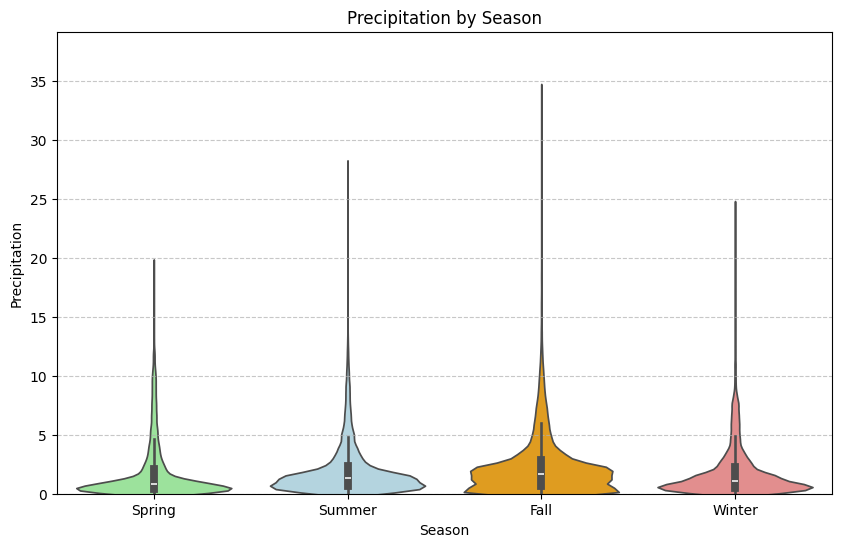

In [ ]:
data = pd.read_csv('data_index_2.csv')
print(data[['Pre_SpringMean', 'Pre_SummerMean', 'Pre_FallMean', 'Pre_WinterMean']].describe())

data_long = pd.melt(data,
                    value_vars=['Pre_SpringMean', 'Pre_SummerMean', 'Pre_FallMean', 'Pre_WinterMean'],
                    var_name='Season',
                    value_name='Precipitation')

season_order = ['Pre_SpringMean', 'Pre_SummerMean', 'Pre_FallMean', 'Pre_WinterMean']
data_long['Season'] = pd.Categorical(data_long['Season'], categories=season_order, ordered=True)

palette = {
    'Pre_SpringMean': 'lightgreen',
    'Pre_SummerMean': 'lightblue',
    'Pre_FallMean': 'orange',
    'Pre_WinterMean': 'lightcoral'
}

plt.figure(figsize=(10, 6))
sns.violinplot(x='Season', y='Precipitation', data=data_long, order=season_order, palette=palette)

plt.title('Precipitation by Season')
plt.xlabel('Season')
plt.ylabel('Precipitation')
plt.xticks(ticks=range(len(season_order)), labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.ylim(0, data_long['Precipitation'].max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

       tmp_SpringMean  tmp_SummerMean  tmp_FallMean  tmp_WinterMean
count    59191.000000    59191.000000  59191.000000    59191.000000
mean       274.788838      286.762667    290.703906      278.726735
std         20.641969       11.638588      8.423811       17.357666
min        228.890000      254.620000    266.520000      237.120000
25%        257.360000      277.890000    284.160000      264.365000
50%        275.230000      287.450000    290.360000      279.560000
75%        295.930000      297.100000    298.000000      296.110000
max        305.100000      308.070000    309.180000      304.670000


<ipython-input-10-3a46b5bc9a6c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Season', y='Temperature', data=data_long, order=season_order, palette=palette)


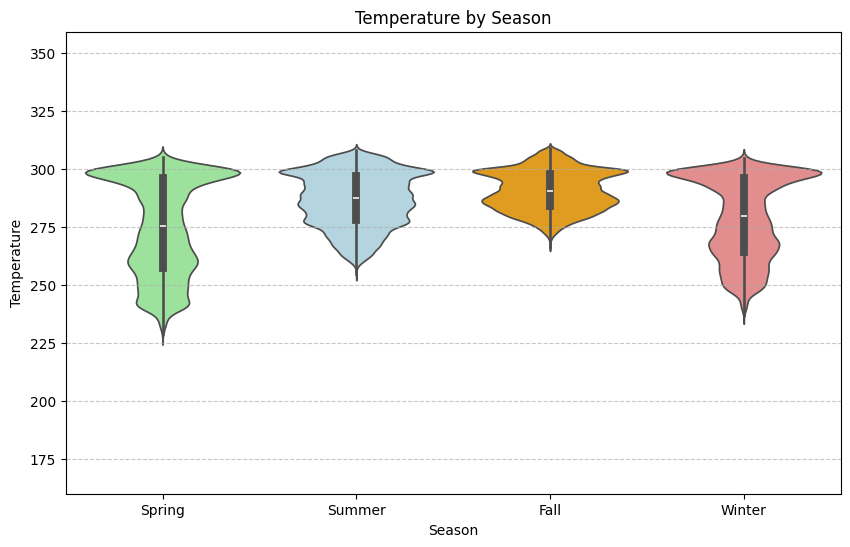

In [ ]:
print(data[['tmp_SpringMean', 'tmp_SummerMean', 'tmp_FallMean', 'tmp_WinterMean']].describe())
data_long = pd.melt(data,
                    value_vars=['tmp_SpringMean', 'tmp_SummerMean', 'tmp_FallMean', 'tmp_WinterMean'],
                    var_name='Season',
                    value_name='Temperature')

season_order = ['tmp_SpringMean', 'tmp_SummerMean', 'tmp_FallMean', 'tmp_WinterMean']
data_long['Season'] = pd.Categorical(data_long['Season'], categories=season_order, ordered=True)

palette = {
    'tmp_SpringMean': 'lightgreen',
    'tmp_SummerMean': 'lightblue',
    'tmp_FallMean': 'orange',
    'tmp_WinterMean': 'lightcoral'
}

plt.figure(figsize=(10, 6))

sns.violinplot(x='Season', y='Temperature', data=data_long, order=season_order, palette=palette)

plt.title('Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.xticks(ticks=range(len(season_order)), labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.ylim(160, data_long['Temperature'].max() + 50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Visualize LPJ-GUESS output's Biome_obs

In [ ]:
# Load data
df = pd.read_csv('LPJ-GUESS_output_BERN1.csv')

# Extract longitude, latitude, and biome_obs columns
longitude = df['Lon']
latitude = df['Lat']
biome = df['Biome_obs']

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Combine longitude and latitude into a GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(longitude, latitude)]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

In [ ]:
biome_colors = {
    1: (0.5, 1, 1),    # Red
    2: (0, 0.6, 0.6),    # Blue
    3: (0.31, 0.94, 0.65),    # Green
    4: (0.8, 1, 0.84),
    5: (0.45, 1, 0),
    6: (0.1, 0.49, 0.73),
    7: (0.55, 0.71, 0),
    8: (0.05, 0.85, 0.25),
    9: (0, 0.55, 0.2),
    10: (0.78, 0.53, 0.14),
    11: (0.8, 1, 0),
    12: (0.85, 0.7, 0),
    13: (0.98, 0.78, 0),
    14: (1, 0.88, 0.41),
    15: (1, 0.29, 0.6),
    16: (0.94, 1, 0.9),
    17: (1, 1, 0.7),
    18: (0.8, 0.8, 1)
    # Add more colors for other biomes using RGB values
}


18


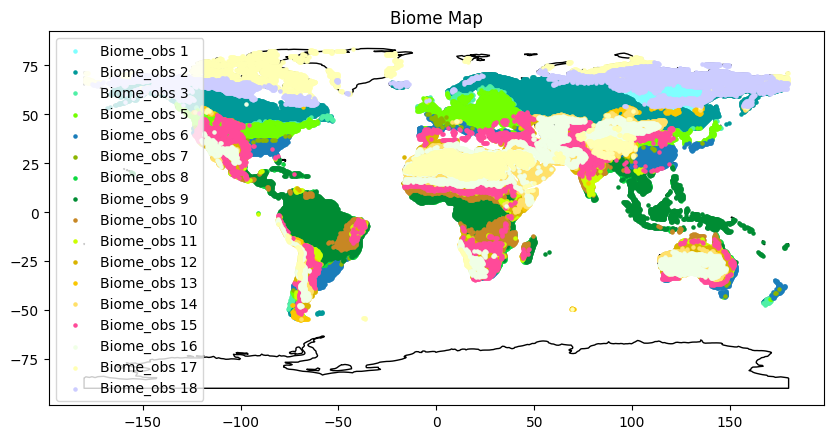

In [ ]:
# Create a base map
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)
#world = gpd.read_file(gdf)
ax = world.plot(figsize=(10, 10), color='white', edgecolor='black')

# Plot points with different colors based on biome
for b in set(biome):
    gdf_b = gdf[gdf['Biome_obs'] == b]
    gdf_b.plot(ax=ax, color=biome_colors[b], label=f'Biome_obs {b}', markersize=5)
print(b)
# Add legend
plt.legend()

# Add a title
plt.title('Biome Map')

# Show the map
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy
import seaborn as sns
data_ridge = lpj_guess_data[factors].copy()
data_ridge['Biome_obs'] = data['Biome_obs']

biomes = data_ridge['Biome_obs'].unique()

colors = sns.color_palette("husl", len(biomes))

for factor in factors:
    plt.figure(figsize=(12, 8))

    joypy.joyplot(data=data_ridge, by='Biome_obs', column=factor, fade=False, grid=True,
                   linewidth=1, overlap=0.5, color=colors)

    plt.title(f'Distribution of {factor} across Biomes')
    plt.xlabel('Value')
    plt.ylabel('Biome')

    plt.yticks(ticks=range(len(biomes)), labels=biomes)

    plt.show()

ModuleNotFoundError: No module named 'joypy'

In [ ]:
biome_data_file = 'legend of biomes.txt'

biome_colors = {}
biome_names = {}

def parse_rgb_value(value):
    # Check if the value starts with a dot and add a leading zero if needed
    if value.startswith('.'):
        value = '0' + value
    return float(value)

with open(biome_data_file, 'r') as file:
    lines = file.readlines()
    i = 0
    while i < len(lines):

        biome_number, biome_name = lines[i].strip().split(maxsplit=1)

        rgb_values = list(map(parse_rgb_value, lines[i + 1].strip().split()))
        #rgb_tuple = tuple(int(val * 255) for val in rgb_values)   # no need to do this.....indexerror will arise

        # Add data to dictionaries
        biome_colors[int(biome_number)] = rgb_values
        biome_names[int(biome_number)] = biome_name

        # Move to the next biome data
        i += 2


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.use('Agg')
# Create a base map
fig, ax = plt.subplots(figsize=(12, 12),dpi=300)
world = gpd.read_file(url)
ax = world.plot(ax=ax, color='white', edgecolor='black')

# Plot points with different colors based on biome
for b in set(biome):
    print(b) #test the position
    gdf_b = gdf[gdf['Biome_obs'] == b]
    gdf_b.plot(ax=ax, color=biome_colors[b], label=biome_names[b], markersize=5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Add legend
#plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# Add a title
plt.title('Biome Map')

# Show the map
plt.show()
plt.savefig('biome_map.png', dpi=300, bbox_inches='tight')

In [ ]:
# Load LPJ-GUESS data
lpj_guess_data = pd.read_csv('LPJ-GUESS_output_BERN1.csv')

# Load country code data
country_data = pd.read_csv('gridlist_pan_gfed_ISO3_UN.txt', delim_whitespace=True)

# Merge LPJ-GUESS data with country data based on Lon and Lat
merged_data = lpj_guess_data.merge(country_data, on=['Lon', 'Lat'], how='inner')

# Create a dictionary mapping each country to unique biomes within it
country_biome_dict = (
    merged_data.groupby('Pan_2007')['Biome_obs']
    .apply(lambda x: x.unique().tolist())
    .to_dict()
)

# Display the dictionary to see biomes present in each country
print("Country to Biome Mapping Dictionary:")
for country, biomes in country_biome_dict.items():
    print(f"{country}: {biomes}")

# Extract data for two specific neighboring biomes (e.g., biomes 1 and 2) across two countries
biome_1 = 2
biome_2 = 18
selected_countries = ['Russia', 'Canada']  # Adjust to countries where these biomes are neighbors

# Filter merged data for the selected biomes and countries
filtered_data = merged_data[
    (merged_data['Biome_obs'].isin([biome_1, biome_2])) &
    (merged_data['Pan_2007'].isin(selected_countries))
]

# Display the filtered data for model preparation
print("Filtered Data for Binary Classification Model:")
print(filtered_data.head())


# **Part 3: Binary classification**


In [ ]:
# Load the dataset
data = pd.read_csv('data_index_2.csv')

# Select relevant input features by dropping unnecessary columns
X = data.drop([
    'CN', 'pH', 'cellfraction', 'NPP', 'SoilR', 'MaxBiomeCmax', 'MaxBiomeLAI',
    'VegC', 'LitterC', 'SoilC', 'Biome_Cmax', 'Biome_LAI', 'Biome_obs',
    'GFED-region', 'Pan_2007', 'ISO3', 'UN'
], axis=1, errors='ignore')

# Define the target variable for classification
y_biome_obs = data['Biome_obs']  # Target for binary classification

In [ ]:
# Specify the biomes and countries for binary classification
biome_1, biome_2 = 2, 18
country1_code, country2_code = "'Canada'", "'Russia'"
# Filter dataset based on selected biomes and countries
f_data = data[(data['Biome_obs'].isin([biome_1, biome_2])) &
                     (data['Pan_2007'].isin([country1_code, country2_code]))]

# Split filtered data by country for training and testing
train_data = f_data[f_data['Pan_2007'] == country1_code] # Canada
test_data = f_data[f_data['Pan_2007'] == country2_code] # Russia

Using **all variables**.

Model Evaluation for Biome Classification:
Accuracy: 0.930078217587106
Precision: 0.9888943731490621
Recall: 0.8802724077328646


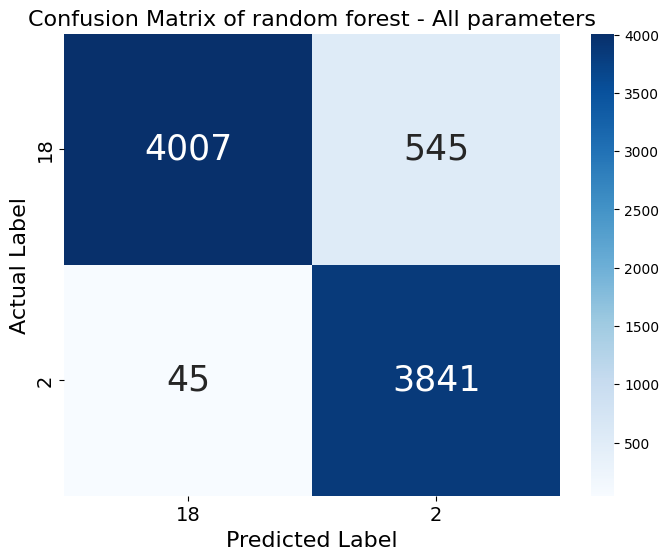

In [ ]:
# Ensure the selected columns for X do not include target or irrelevant identifiers
X_train = train_data[X.columns]
y_train = train_data['Biome_obs']
X_test = test_data[X.columns]
y_test = test_data['Biome_obs']

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_est is numb. of trees, rand. state is like "seed()"
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate and display evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=biome_1)
recall = recall_score(y_test, y_pred, pos_label=biome_1)
conf_m = confusion_matrix(y_test, y_pred)

print("Model Evaluation for Biome Classification:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique(), annot_kws={"size": 25})
plt.title('Confusion Matrix of random forest - All parameters', size = 16)
plt.ylabel('Actual Label', size = 16)
plt.xlabel('Predicted Label', size = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

67


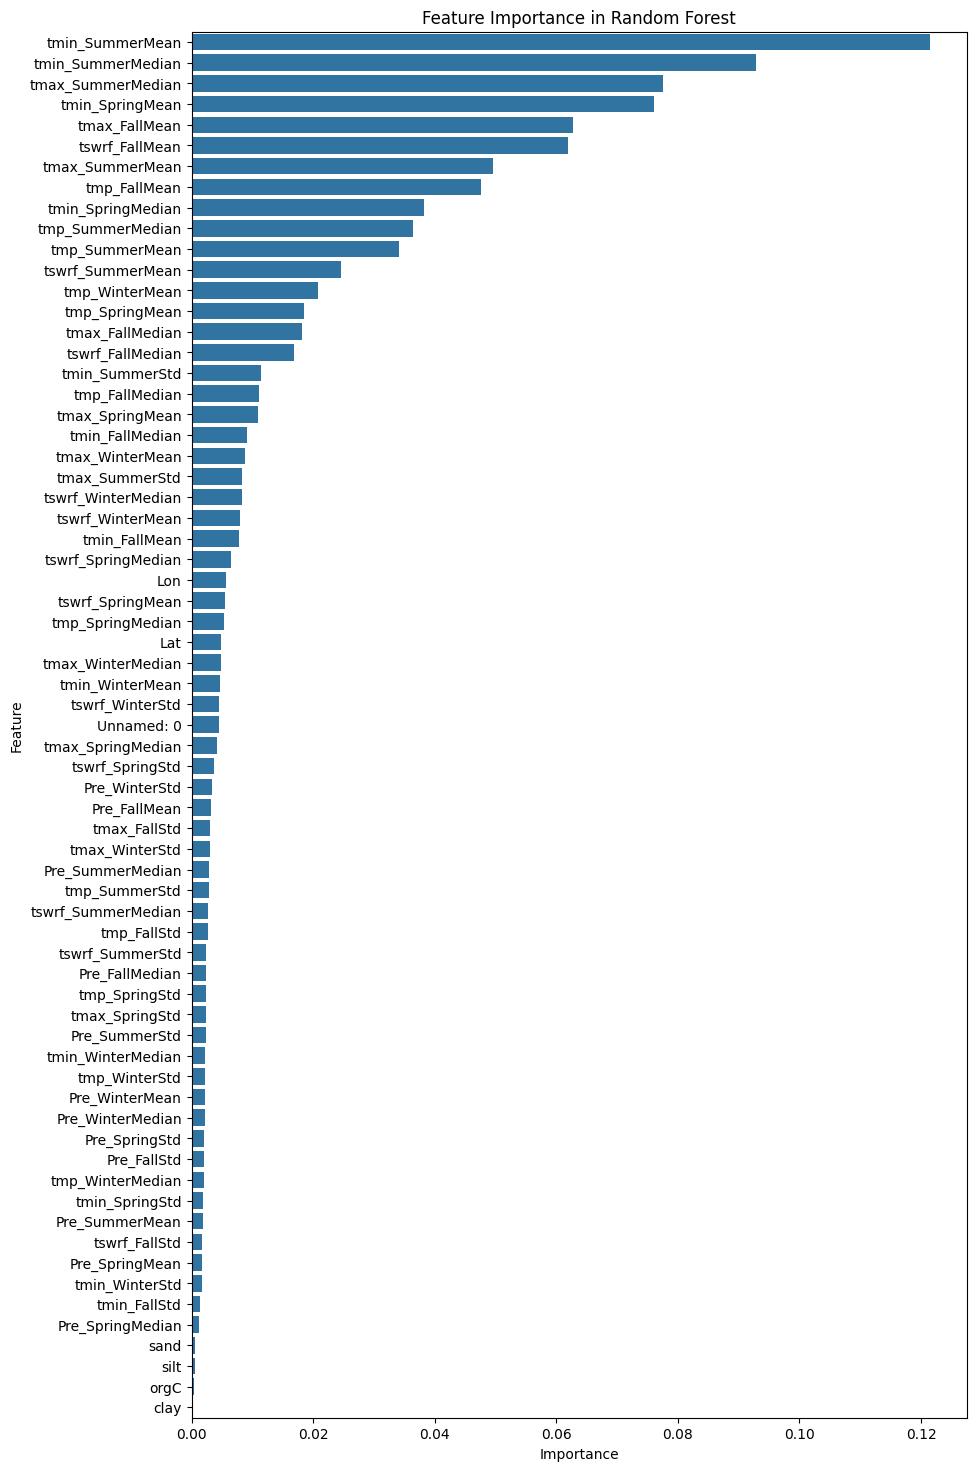

In [ ]:
# Get feature importance from the model
importances_b = rf_model.feature_importances_

X_train_df = pd.DataFrame(X_train, columns=X.columns)
# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': importances_ｂ})

print(len(X_train_df.columns))

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 18))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

Misclassified Samples:
       Unnamed: 0     Lon    Lat  clay  silt  sand   orgC    CN   pH  \
30685       30685   33.75  67.75  0.06  0.20  0.74  0.030  17.0  4.5   
31649       31649   36.75  68.25  0.06  0.20  0.74  0.030  17.0  4.5   
31956       31956   37.75  68.25  0.06  0.20  0.74  0.030  17.0  4.5   
32559       32559   39.75  67.75  0.41  0.33  0.26  0.307  21.0  4.4   
33745       33745   44.25  68.25  0.08  0.37  0.55  0.020  11.0  5.9   
...           ...     ...    ...   ...   ...   ...    ...   ...  ...   
58905       58905  172.75  61.25  0.27  0.30  0.43  0.014  11.0  7.6   
58952       58952  173.75  61.75  0.20  0.48  0.32  0.031  17.0  6.3   
58975       58975  174.25  61.75  0.27  0.30  0.43  0.014  11.0  7.6   
59048       59048  175.75  62.25  0.20  0.48  0.32  0.031  17.0  6.3   
59074       59074  176.25  62.25  0.20  0.48  0.32  0.031  17.0  6.3   

       cellfraction  ...   VegC  LitterC   SoilC  Biome_Cmax  Biome_LAI  \
30685         0.500  ...  4.454   11.

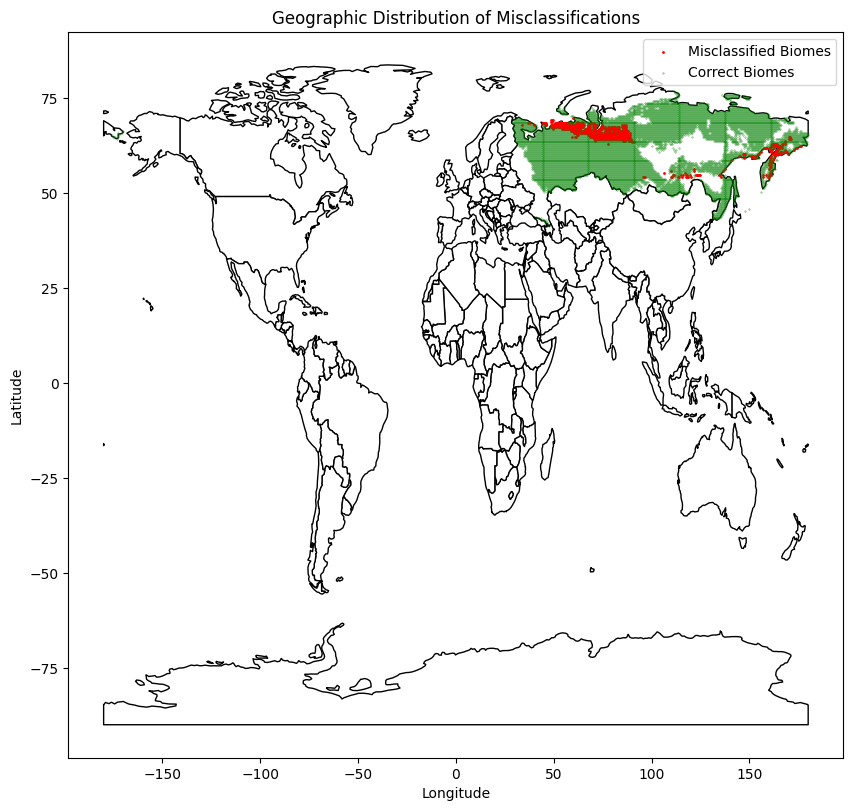

In [ ]:
# Identify misclassified samples
misclassified = test_data[y_pred != y_test]
correct = test_data[y_pred == y_test]
print("Misclassified Samples:")
print(misclassified)

# Create a base map
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)

# Plot the world map and misclassified points

# Convert misclassified samples to a GeoDataFrame
misclassified_geo = gpd.GeoDataFrame(
    misclassified,
    geometry=gpd.points_from_xy(misclassified['Lon'], misclassified['Lat']),
    crs="EPSG:4326"
)
correct_geo = gpd.GeoDataFrame(
    correct,
    geometry=gpd.points_from_xy(correct['Lon'], correct['Lat']),
    crs="EPSG:4326"
)
# Plot the world map and misclassified points
ax = world.plot(figsize=(10, 10), color='white', edgecolor='black')
# Plot misclassified points in red
misclassified_geo.plot(ax=ax, color='red', marker='o',markersize=1, label="Misclassified Biomes")
correct_geo.plot(ax=ax, color='green', marker='x',markersize=1, alpha =0.3, label="Correct Biomes")

# Add a title and legend
plt.title("Geographic Distribution of Misclassifications")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Now using **only** temp, precip and radiation.

Model Accuracy with Temperature and Precipitation Subset: 0.8894287745911353


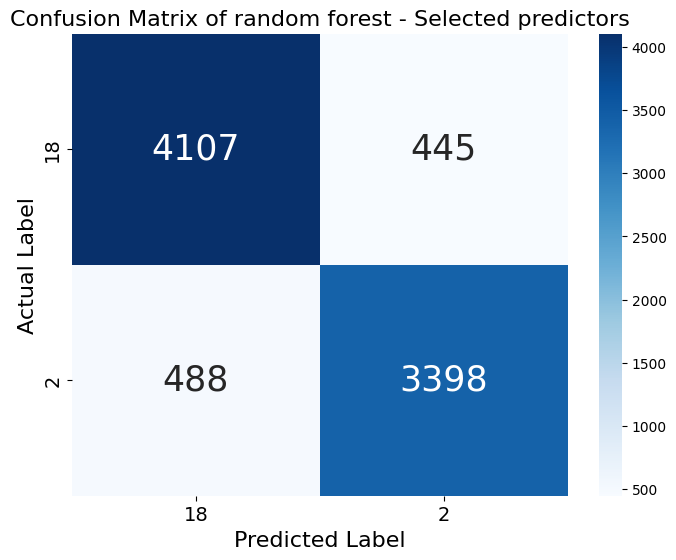

Top Features by Importance in the Subset Model:
            Feature  Importance
2     tmax_FallMean    0.232733
4    tswrf_FallMean    0.206249
5  tswrf_FallMedian    0.149670
6      tmp_FallMean    0.116810
3   tmax_FallMedian    0.075115
0     tmin_FallMean    0.052673
8      Pre_FallMean    0.044482
1   tmin_FallMedian    0.042568
7    tmp_FallMedian    0.040681
9    Pre_FallMedian    0.039019


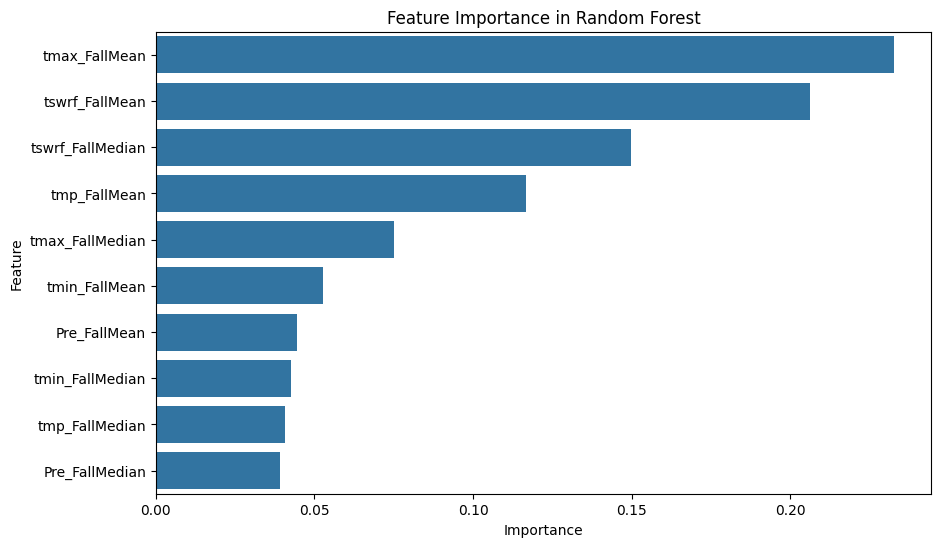

In [ ]:
# Define a subset of climate variables (e.g., temperature and precipitation)
selected_features = ['tmin_FallMean','tmin_FallMedian', 'tmax_FallMean','tmax_FallMedian', 'tswrf_FallMean',
                     'tswrf_FallMedian', 'tmp_FallMean','tmp_FallMedian', 'Pre_FallMean','Pre_FallMedian']

# Create new train and test sets with only the selected features
X_train_subset = X_train[selected_features]
X_test_subset = X_test[selected_features]

# Train a new Random Forest model with only the selected subset of features
rf_model_subset = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_subset.fit(X_train_subset, y_train)

# Evaluate the subset model
y_pred_subset = rf_model_subset.predict(X_test_subset)
accuracy_subset = accuracy_score(y_test, y_pred_subset)
print(f"Model Accuracy with Temperature and Precipitation Subset: {accuracy_subset}")
# Calculate and display evaluation metrics
accuracy = accuracy_score(y_test, y_pred_subset)
precision = precision_score(y_test, y_pred_subset, pos_label=biome_1)
recall = recall_score(y_test, y_pred_subset, pos_label=biome_1)
conf_ms = confusion_matrix(y_test, y_pred_subset)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_ms, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique(), annot_kws={"size": 25})
plt.title('Confusion Matrix of random forest - Selected predictors', size = 16)
plt.ylabel('Actual Label', size = 16)
plt.xlabel('Predicted Label', size = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Get feature importances for the subset model
subset_feature_importances = rf_model_subset.feature_importances_
subset_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': subset_feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top Features by Importance in the Subset Model:")
print(subset_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=subset_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

In [ ]:
# Identify misclassified samples
misclassified = test_data[y_pred_subset != y_test]
correct = test_data[y_pred_subset == y_test]
print("Misclassified Samples:")
print(misclassified)

Misclassified Samples:
       Unnamed: 0     Lon    Lat  clay  silt  sand   orgC    CN   pH  \
28906       28906   28.75  68.25  0.06  0.20  0.74  0.030  17.0  4.5   
29092       29092   29.25  68.75  0.06  0.20  0.74  0.030  17.0  4.5   
29093       29093   29.25  68.25  0.06  0.20  0.74  0.030  17.0  4.5   
29277       29277   29.75  69.25  0.41  0.33  0.26  0.307  21.0  4.4   
29278       29278   29.75  68.75  0.41  0.33  0.26  0.307  21.0  4.4   
...           ...     ...    ...   ...   ...   ...    ...   ...  ...   
58905       58905  172.75  61.25  0.27  0.30  0.43  0.014  11.0  7.6   
58952       58952  173.75  61.75  0.20  0.48  0.32  0.031  17.0  6.3   
58975       58975  174.25  61.75  0.27  0.30  0.43  0.014  11.0  7.6   
59048       59048  175.75  62.25  0.20  0.48  0.32  0.031  17.0  6.3   
59074       59074  176.25  62.25  0.20  0.48  0.32  0.031  17.0  6.3   

       cellfraction  ...   VegC  LitterC   SoilC  Biome_Cmax  Biome_LAI  \
28906         0.471  ...  4.503   12.

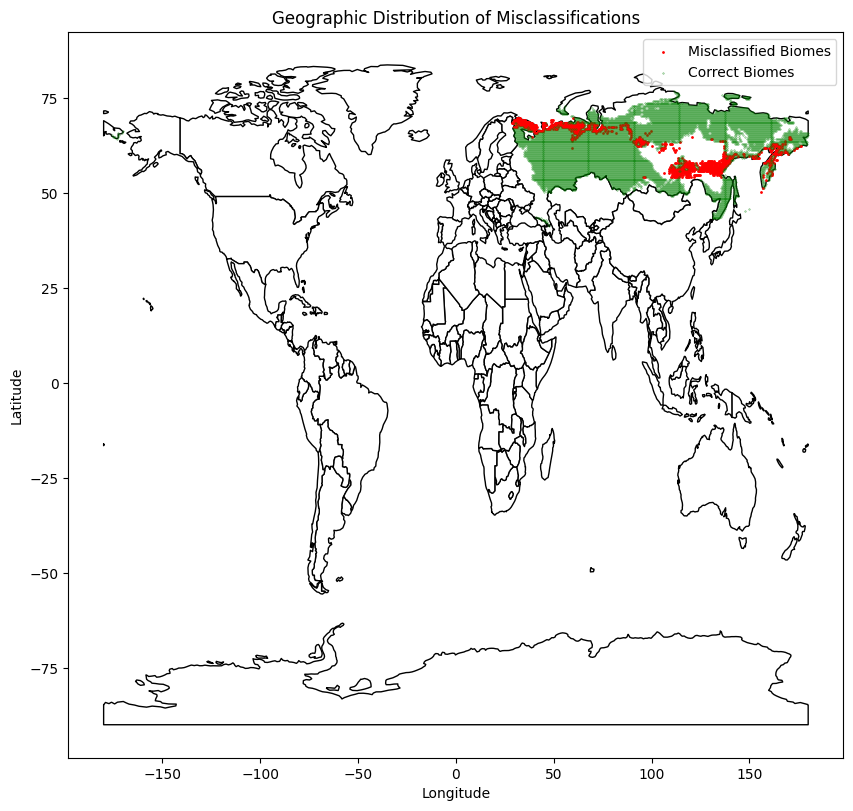

In [ ]:
# Create a base map
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)

# Plot the world map and misclassified points

# Convert misclassified samples to a GeoDataFrame
misclassified_geo = gpd.GeoDataFrame(
    misclassified,
    geometry=gpd.points_from_xy(misclassified['Lon'], misclassified['Lat']),
    crs="EPSG:4326"
)
correct_geo = gpd.GeoDataFrame(
    correct,
    geometry=gpd.points_from_xy(correct['Lon'], correct['Lat']),
    crs="EPSG:4326"
)
# Plot the world map and misclassified points
ax = world.plot(figsize=(10, 10), color='white', edgecolor='black')
# Plot misclassified points in red
misclassified_geo.plot(ax=ax, color='red', marker='o',markersize=1, label="Misclassified Biomes")
correct_geo.plot(ax=ax, color='green', marker='x',markersize=1, alpha =0.3, label="Correct Biomes")

# Add a title and legend
plt.title("Geographic Distribution of Misclassifications")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# **Part 4: Multiclass classification:**

First the data are split into the two regions: Africa and The Americas.
Next, the X data are specified, as being all the relevant predictors, excluding the responses (biome obs and biome cmax) and non biome specific data (like pan 2007 etc.).

In [ ]:
# Load the data
data = pd.read_csv('data_index_2.csv')  # Replace with the actual file path

# Define target regions and countries based on `Pan_2007` `

region1_countries = ["'Americas'"]  # Training continent
region2_countries = ["'Africa'"]  # Testing Continent

# Filter data based on selected countries
region1_data = data[data['Pan_2007'].isin(region1_countries)]
region2_data = data[data['Pan_2007'].isin(region2_countries)]

## Defining X and y for each country
# Americas ------
X_am = region1_data.drop([
    'CN','pH','cellfraction','NPP' ,'SoilR' ,'MaxBiomeCmax', 'MaxBiomeLAI',
    'VegC', 'LitterC','SoilC' ,'Biome_Cmax', 'Biome_LAI', 'Biome_obs',
    'GFED-region', 'Pan_2007','ISO3', 'UN']  # Drop non-feature columns
    , axis=1, errors='ignore')

y_biome_obs_am = region1_data['Biome_obs']  # Target for model 1
y_biome_cmax_am = region1_data['Biome_Cmax']  # Target for model 2

# Africa ------
X_af = region2_data.drop([
    'CN','pH','cellfraction','NPP' ,'SoilR' ,'MaxBiomeCmax', 'MaxBiomeLAI',
    'VegC', 'LitterC','SoilC' ,'Biome_Cmax', 'Biome_LAI', 'Biome_obs',
    'GFED-region', 'Pan_2007','ISO3', 'UN']  # Drop non-feature columns
    , axis=1, errors='ignore')

y_biome_obs_af = region2_data['Biome_obs']  # Target for model 1
y_biome_cmax_af = region2_data['Biome_Cmax']  # Target for model 2

# Combine data for training and testing
selected_data = pd.concat([region1_data, region2_data])
# Define features (X) and targets for `Biome_obs` and `Biome_Cmax`
X = selected_data.drop([
    'Biome_obs', 'Biome_Cmax', 'Pan_2007', 'ISO3', 'GFED-region'  # Drop non-feature columns
], axis=1, errors='ignore')
y_biome_obs = selected_data['Biome_obs']  # Target for model 1
y_biome_cmax = selected_data['Biome_Cmax']  # Target for model 2

In [ ]:
print(region2_data.loc[:,['Lon','Biome_obs']])

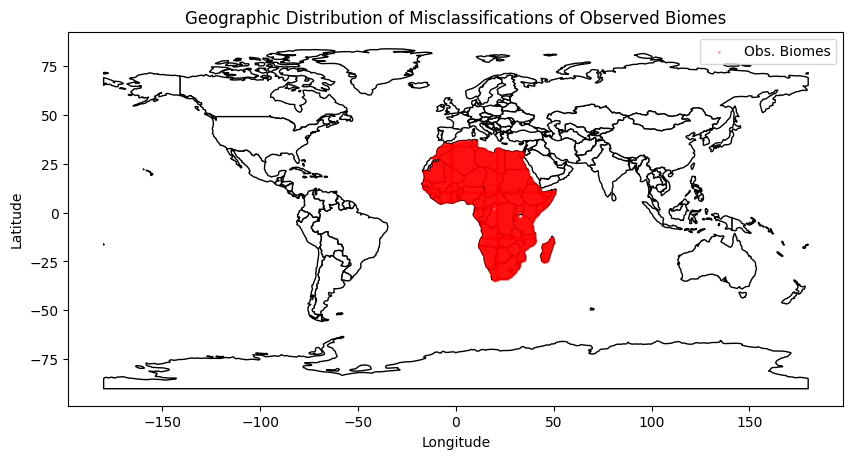

In [ ]:
## Plotting correct and incorrect classifications of OBS
# Convert misclassified samples to a GeoDataFrame
y_af = region2_data.loc[:,['Lon', 'Lat', 'Biome_obs']]
geo = gpd.GeoDataFrame(
    y_af.loc[:,'Biome_obs'],
    geometry=gpd.points_from_xy(y_af['Lon'], y_af['Lat']),
    crs="EPSG:4326"
)
# Plot the world map and misclassified points
ax = world.plot(figsize=(10, 10), color='white', edgecolor='black')
# Plot misclassified points in red
geo.plot(ax=ax, color='red', marker='o',markersize=1,alpha =0.3, label="Obs. Biomes")

# Add a title and legend
plt.title("Geographic Distribution of Misclassifications of Observed Biomes")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Then the data are split accurding to test and training data for the two different kinds of response - Observed biome and Max Carbon classification (response variables specified just above.).

Next, the obs and cmax models are fit to the training data.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training + validation and test sets
X_train_biome, X_test_biome, y_biome_obs_train, y_biome_obs_test = train_test_split(X, y_biome_obs, test_size=0.2, random_state=42)
X_train_cmax, X_test_cmax, y_biome_cmax_train, y_biome_cmax_test = train_test_split(X, y_biome_cmax, test_size=0.2, random_state=42)

# For Americas only ---------------
X_train_obs_am, X_test_obs_am, y_obs_train_am, y_obs_test_am = train_test_split(X_am, y_biome_obs_am, test_size=0.2, random_state=42)
X_train_cmax_am, X_test_cmax_am, y_cmax_train_am, y_cmax_test_am = train_test_split(X_am, y_biome_cmax_am, test_size=0.2, random_state=42)
# ---------------------------------

# Initialize the Random Forest models
rf_model_biome_obs = RandomForestClassifier(random_state=42)
rf_model_biome_cmax = RandomForestClassifier(random_state=42)

# For Americas ----------------
Am_model_biome_obs = RandomForestClassifier(random_state=42)
Am_model_biome_cmax = RandomForestClassifier(random_state=42)
# -----------------------------

# Train models on the training set
rf_model_biome_obs.fit(X_train_biome, y_biome_obs_train)
rf_model_biome_cmax.fit(X_train_cmax, y_biome_cmax_train)

# For Americas -----------------
Am_model_biome_obs.fit(X_train_obs_am, y_obs_train_am)
Am_model_biome_cmax.fit(X_train_cmax_am, y_cmax_train_am)
# # ----------------------------

RandomForestClassifier(random_state=42)

## **Optimizing models hyper parameters:**
Now, the optimal parameters of the random forest models (num. of trees andtree depth) are being found with 3-fold CV.

First we run CV for **Americas** with the **Observed Biomes** model.

In [ ]:
## For Americas only - Observed Biomes
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
# Define KFold cross-validation with 3 splits to save on runtime
kfold3 = KFold(n_splits=3, random_state=1, shuffle=True)

# Parameter ranges
n_depths_range = np.linspace(10, 20, 11).astype('int')  # Depths from 1 to 10
n_estimators_range = np.linspace(140, 180, 5).astype('int')  # Trees from 10 to 100 in steps of 10

# Define the parameter grid for tuning
params = {
    'max_depth': n_depths_range,  # Range of depths
    'n_estimators': n_estimators_range,  # Range of estimators (trees)
}

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with the parameter grid and KFold cross-validation
rfc_gscv = GridSearchCV(clf, param_grid=params, scoring="accuracy", cv=kfold3)

# Fit the model on your training data
model_rfc_obs = rfc_gscv.fit(X_train_obs_am, y_obs_train_am)

# Extract the best parameters and CV score
max_depths_obs_am = model_rfc_obs.best_estimator_.get_params()["max_depth"]
max_trees_obs_am = model_rfc_obs.best_estimator_.get_params()["n_estimators"]
max_cvs_obs_am = rfc_gscv.best_score_

# Print the results
print("Optimal Max Depth: ", max_depths_obs_am)
print("Optimal Number of Trees: ", max_trees_obs_am)
print("Best Cross-Validation Accuracy: ", max_cvs_obs_am)

# Optimal Max Depth:  16
# Optimal Number of Trees:  170
# Best Cross-Validation Accuracy:  0.8186408308621118

Next we run CV for **Americas** with the **CMax Biomes** model.

In [ ]:
# Americas only - CMax Biomes
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
# Define KFold cross-validation with 3 splits to save on runtime
kfold3 = KFold(n_splits=3, random_state=1, shuffle=True)

# Parameter ranges
n_depths_range = np.linspace(8, 13, 6).astype('int')  # Depths from 1 to 10
n_estimators_range = np.linspace(40, 80, 5).astype('int')  # Trees from 10 to 100 in steps of 10

# Define the parameter grid for tuning
params = {
    'max_depth': n_depths_range,  # Range of depths
    'n_estimators': n_estimators_range,  # Range of estimators (trees)
}

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with the parameter grid and KFold cross-validation
rfc_gscv = GridSearchCV(clf, param_grid=params, scoring="accuracy", cv=kfold3)

# Fit the model on your training data
model_rfc_obs = rfc_gscv.fit(X_train_cmax_am, y_cmax_train_am)

# Extract the best parameters and CV score
max_depths_cmax_am = model_rfc_obs.best_estimator_.get_params()["max_depth"]
max_trees_cmax_am = model_rfc_obs.best_estimator_.get_params()["n_estimators"]
max_cvs_cmax_am = rfc_gscv.best_score_

# Print the results
print("Optimal Max Depth: ", max_depths_cmax_am)
print("Optimal Number of Trees: ", max_trees_cmax_am)
print("Best Cross-Validation Accuracy: ", max_cvs_cmax_am)

# Optimal Max Depth:  12
# Optimal Number of Trees:  80
# Best Cross-Validation Accuracy:  0.9289194011240985

Then we run CV for the **Concatonated Data** with the **Observed Biomes** model.

In [ ]:
# Concatonated data
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
# Define KFold cross-validation with 3 splits to save on runtime
kfold3 = KFold(n_splits=3, random_state=1, shuffle=True)

# Parameter ranges
n_depths_range = np.linspace(15, 20, 5).astype('int')  # Depths from 1 to 10
n_estimators_range = np.linspace(130, 140, 10).astype('int')  # Trees from 10 to 100 in steps of 10

# Define the parameter grid for tuning
params = {
    'max_depth': n_depths_range,  # Range of depths
    'n_estimators': n_estimators_range,  # Range of estimators (trees)
}

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with the parameter grid and KFold cross-validation
rfc_gscv = GridSearchCV(clf, param_grid=params, scoring="accuracy", cv=kfold3)

# Fit the model on your training data
model_rfc_obs = rfc_gscv.fit(X_train_biome, y_biome_obs_train)

# Extract the best parameters and CV score
max_depths_obs = model_rfc_obs.best_estimator_.get_params()["max_depth"]
max_trees_obs = model_rfc_obs.best_estimator_.get_params()["n_estimators"]
max_cvs_obs = rfc_gscv.best_score_

# Print the results
print("Optimal Max Depth: ", max_depths_obs)
print("Optimal Number of Trees: ", max_trees_obs)
print("Best Cross-Validation Accuracy: ", max_cvs_obs)

# Optimal Max Depth:  18
# Optimal Number of Trees:  140
# Best Cross-Validation Accuracy:  0.9121972318339099

Finally we run CV for the **Concatonated Data** with the **CMax Biomes** model.

In [ ]:
# Define KFold cross-validation with 3 splits to save on runtime
kfold3 = KFold(n_splits=3, random_state=1, shuffle=True)

# Parameter ranges
n_depths_range = np.linspace(1, 10, 10).astype('int')  # Depths from 1 to 10
n_estimators_range = np.linspace(10, 100, 10).astype('int')  # Trees from 10 to 100

# Define the parameter grid for tuning
params = {
    'max_depth': n_depths_range,  # Range of depths
    'n_estimators': n_estimators_range,  # Range of estimators (trees)
}

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with the parameter grid and KFold cross-validation
rfc_gscv = GridSearchCV(clf, param_grid=params, scoring="accuracy", cv=kfold3)

# Fit the model on your training data
model_rfc_cmax = rfc_gscv.fit(X_train_cmax, y_biome_cmax_train)

# Extract the best parameters and CV score
max_depths_cmax = model_rfc_cmax.best_estimator_.get_params()["max_depth"]
max_trees_cmax = model_rfc_cmax.best_estimator_.get_params()["n_estimators"]
max_cvs_cmax = rfc_gscv.best_score_

# Print the results
print("Optimal Max Depth: ", max_depths_cmax)
print("Optimal Number of Trees: ", max_trees_cmax)
print("Best Cross-Validation Accuracy: ", max_cvs_cmax)

# Optimal Max Depth:  9
# Optimal Number of Trees:  70
# Best Cross-Validation Accuracy:  0.9586312563840654

## **Final models w/ optimal parameters**
Now, the **Obs. Biomes** and **CMax Biomes** models with the best parameters for **The Americas** from above it fittet and tested on the **Africa** data.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


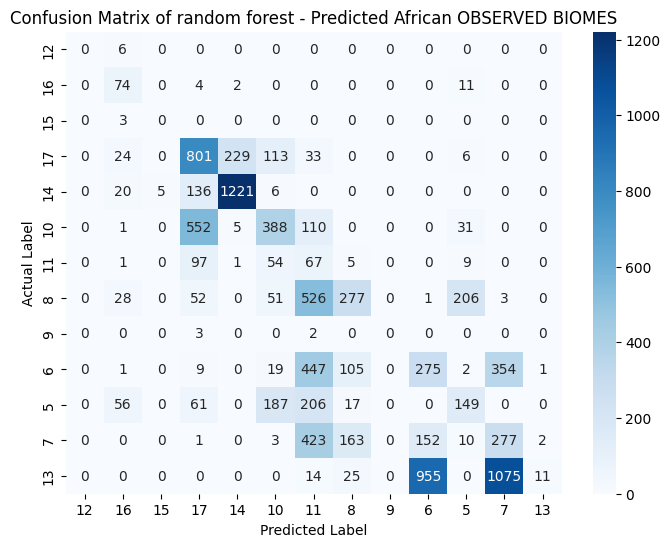

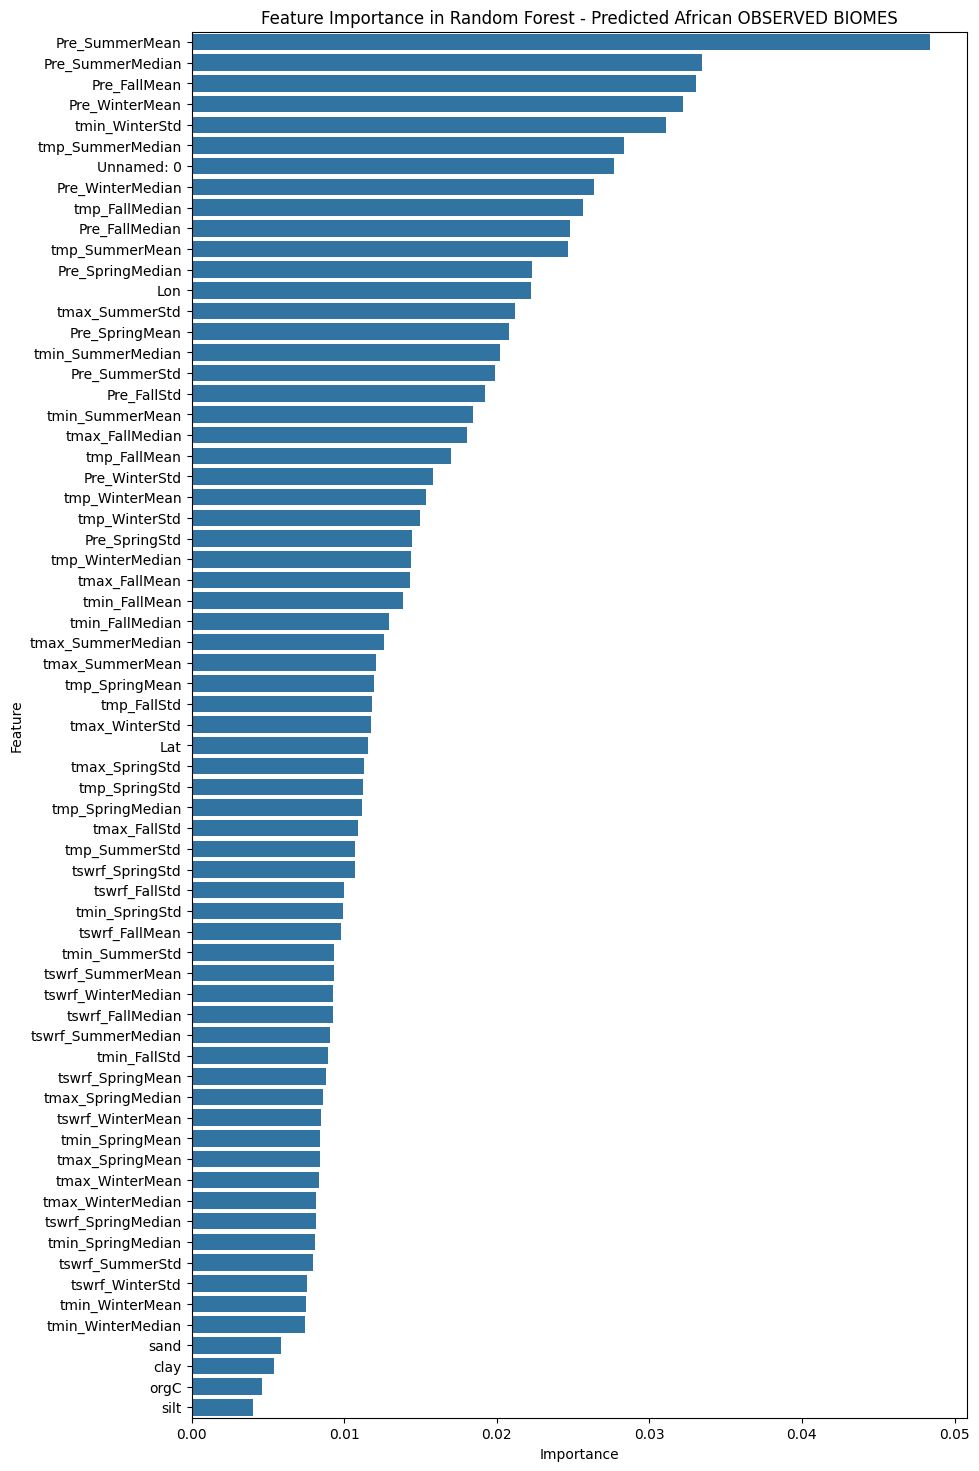

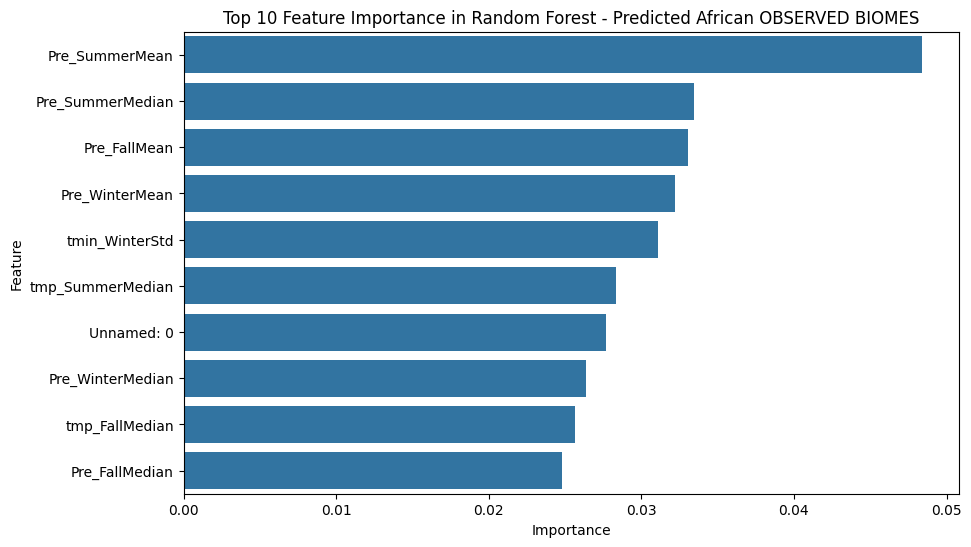

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


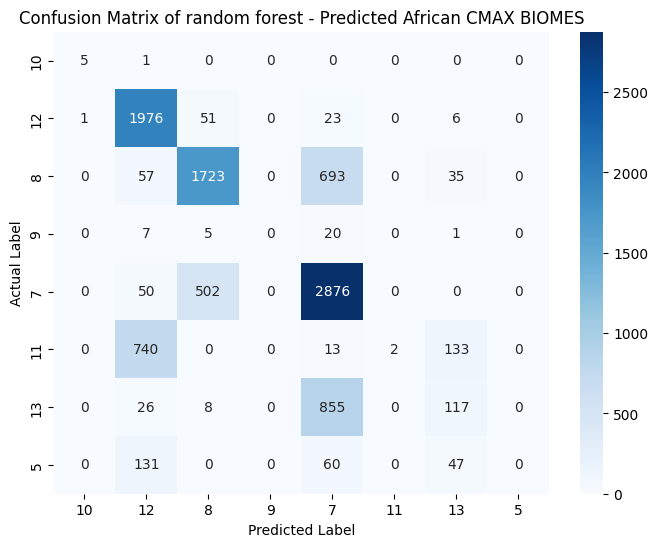

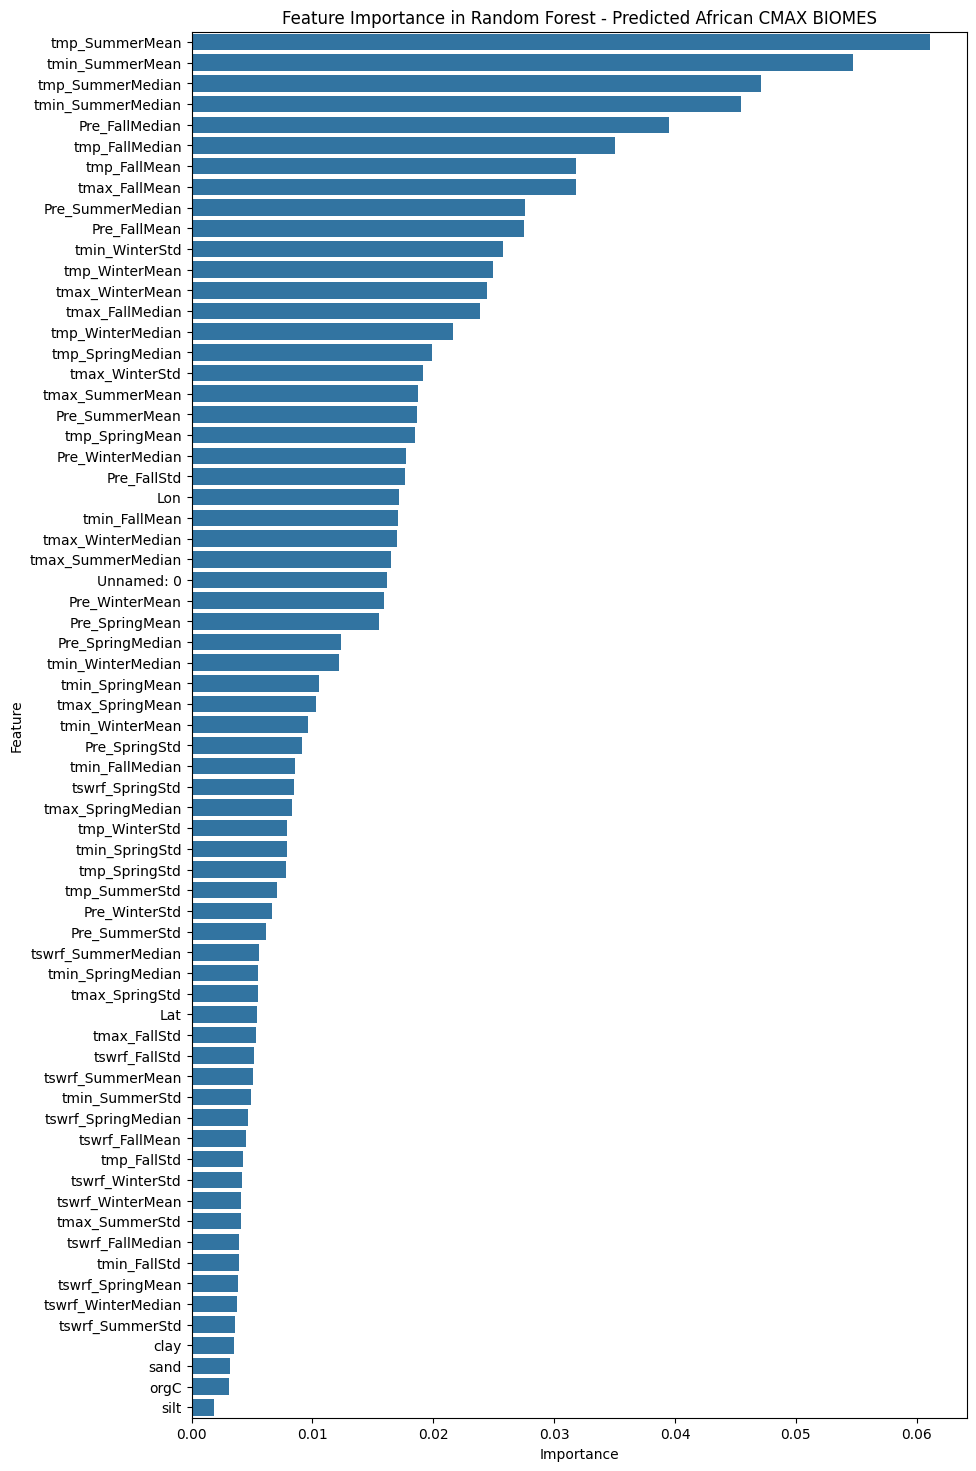

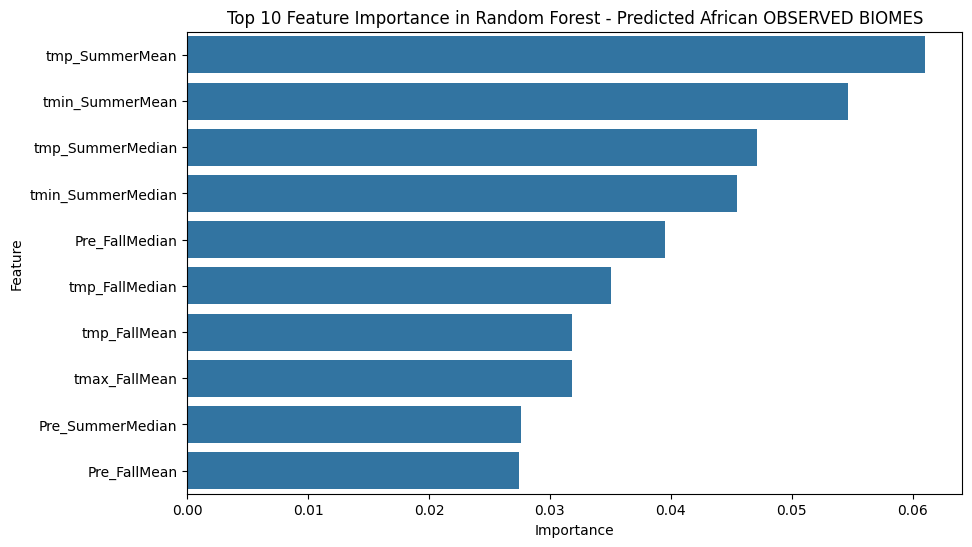

In [ ]:
# Americas - Initialize and train the final Random Forest model with optimized parameters
max_depths_obs_am = 16
max_trees_obs_am = 170
# Best Cross-Validation Accuracy:  0.8186408308621118

final_am_model_obs = RandomForestClassifier(max_depth=max_depths_obs_am, n_estimators=max_trees_obs_am, random_state=42)
final_am_model_obs.fit(X_am, y_biome_obs_am)
# Predict on the test set (Africa)
y_pred_test_obs_af = final_am_model_obs.predict(X_af)

# Evaluate the model performance - y_af vs y_af_pred
accuracy = accuracy_score(y_biome_obs_af, y_pred_test_obs_af)
classification_rep = classification_report(y_biome_obs_af, y_pred_test_obs_af)
conf_mobs = confusion_matrix(y_biome_obs_af, y_pred_test_obs_af)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mobs, annot=True, fmt='d', cmap='Blues', xticklabels=y_biome_obs_af.unique(), yticklabels=y_biome_obs_af.unique())
plt.title('Confusion Matrix of random forest - Predicted African OBSERVED BIOMES')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Get feature importances for the subset model
final_obs_importances = final_am_model_obs.feature_importances_
final_obs_importance_df = pd.DataFrame({
    'Feature': X_train_obs_am.columns,
    'Importance': final_obs_importances
}).sort_values(by='Importance', ascending=False)


# Plot feature importance - STILL MANY PREDICTORS!
plt.figure(figsize=(10, 18))
sns.barplot(x='Importance', y='Feature', data=final_obs_importance_df)
plt.title('Feature Importance in Random Forest - Predicted African OBSERVED BIOMES')
plt.show()
# Sort features by importance and get the top 10
final_top_10_features_df_obs = final_obs_importance_df.sort_values(by='Importance', ascending=False).head(10)
# Plot feature importance - STILL MANY PREDICTORS!
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=final_top_10_features_df_obs)
plt.title('Top 10 Feature Importance in Random Forest - Predicted African OBSERVED BIOMES')
plt.show()
# CMax
max_depths_cmax_am = 12
max_trees_cmax_am = 80
#Best Cross-Validation Accuracy:  0.9289194011240985

final_am_model_cmax = RandomForestClassifier(max_depth=max_depths_cmax_am, n_estimators=max_trees_cmax_am, random_state=42)
final_am_model_cmax.fit(X_am, y_biome_cmax_am)
# Predict on the test set (Africa)
y_pred_test_cmax_af = final_am_model_cmax.predict(X_af)

# Evaluate the model performance - y_af vs y_af_pred
accuracy = accuracy_score(y_biome_cmax_af, y_pred_test_cmax_af)
classification_rep = classification_report(y_biome_cmax_af, y_pred_test_cmax_af)
conf_mcmax = confusion_matrix(y_biome_cmax_af, y_pred_test_cmax_af)

# Plot the confusion matrix - WHY CONF MATRIX SO BIG? WHY THOSE MISSING VALUES?
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mcmax, annot=True, fmt='d', cmap='Blues', xticklabels=y_biome_cmax_af.unique(), yticklabels=y_biome_cmax_af.unique())
plt.title('Confusion Matrix of random forest - Predicted African CMAX BIOMES')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# Get feature importances for the subset model
final_cmax_importances = final_am_model_cmax.feature_importances_
final_cmax_importance_df = pd.DataFrame({
    'Feature': X_train_cmax_am.columns,
    'Importance': final_cmax_importances
}).sort_values(by='Importance', ascending=False)


# Plot feature importance - STILL MANY PREDICTORS!
plt.figure(figsize=(10, 18))
sns.barplot(x='Importance', y='Feature', data=final_cmax_importance_df)
plt.title('Feature Importance in Random Forest - Predicted African CMAX BIOMES')
plt.show()
# Sort features by importance and get the top 10
final_top_10_features_df_cmax = final_cmax_importance_df.sort_values(by='Importance', ascending=False).head(10)
# Plot feature importance - STILL MANY PREDICTORS!
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=final_top_10_features_df_cmax)
plt.title('Top 10 Feature Importance in Random Forest - Predicted African OBSERVED BIOMES')
plt.show()

Now the same is done for the **Concatonated Data**.

In [ ]:
# Initialize and train the final Random Forest model with optimized parameters
final_rf_model_obs = RandomForestClassifier(max_depth=max_depths_obs, n_estimators=max_trees_obs, random_state=42)
final_rf_model_obs.fit(X_train_biome, y_biome_obs_train)
# Predict on the test set
y_pred_test_obs = final_rf_model_obs.predict(X_test_biome)

# Evaluate the model performance
accuracy = accuracy_score(y_biome_obs_test, y_pred_test_obs)
classification_rep = classification_report(y_biome_obs_test, y_pred_test_obs)
conf_mobs = confusion_matrix(y_biome_obs_test, y_pred_test_obs)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mobs, annot=True, fmt='d', cmap='Blues', xticklabels=y_biome_obs_test.unique(), yticklabels=y_biome_obs_test.unique())
plt.title('Confusion Matrix of random forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Get feature importances for the subset model
final_obs_importances = final_rf_model_obs.feature_importances_
final_obs_importance_df = pd.DataFrame({
    'Feature': X_train_biome.columns,
    'Importance': final_obs_importances
}).sort_values(by='Importance', ascending=False)


# Plot feature importance
plt.figure(figsize=(10, 18))
sns.barplot(x='Importance', y='Feature', data=final_obs_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()


NameError: name 'max_depths_obs' is not defined

And this model is then fit and tested on the cmax data.

In [ ]:
# Initialize and train the final Random Forest model with optimized parameters
final_rf_model_cmax = RandomForestClassifier(max_depth=max_depths_cmax, n_estimators=max_trees_cmax, random_state=42)
final_rf_model_cmax.fit(X_train_cmax, y_biome_cmax_train)
# Predict on the test set
y_pred_test_cmax = final_rf_model_cmax.predict(X_test_cmax)

# Evaluate the model performance
accuracy = accuracy_score(y_biome_cmax_test, y_pred_test_cmax)
classification_rep = classification_report(y_biome_cmax_test, y_pred_test_cmax)
conf_mcmax = confusion_matrix(y_biome_cmax_test, y_pred_test_cmax)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mcmax, annot=True, fmt='d', cmap='Blues', xticklabels=y_biome_cmax_test.unique(), yticklabels=y_biome_cmax_test.unique())
plt.title('Confusion Matrix of random forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Get feature importances for the subset model
final_cmax_importances = final_rf_model_cmax.feature_importances_
final_cmax_importance_df = pd.DataFrame({
    'Feature': X_train_cmax.columns,
    'Importance': final_cmax_importances
}).sort_values(by='Importance', ascending=False)


# Plot feature importance
plt.figure(figsize=(10, 18))
sns.barplot(x='Importance', y='Feature', data=final_cmax_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()


Now this **American** model's fit on **Africa** is plotted as *correct* and *incorrect* predictions.

Accuracy = 0.348


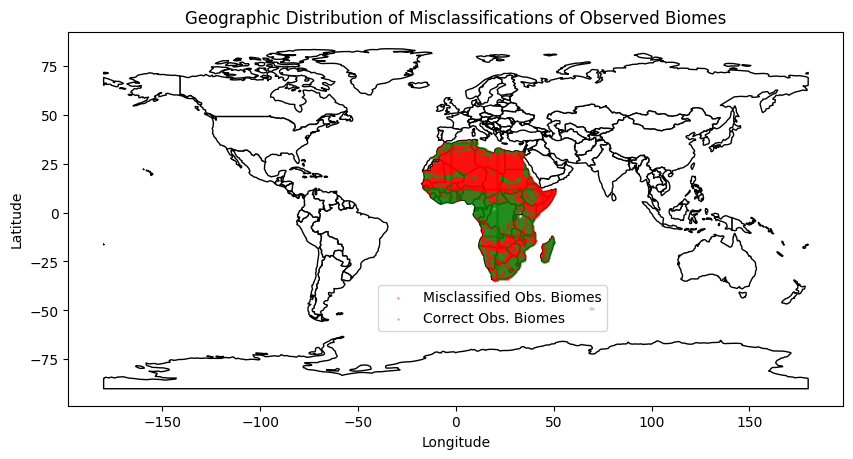

Accuracy = 0.659


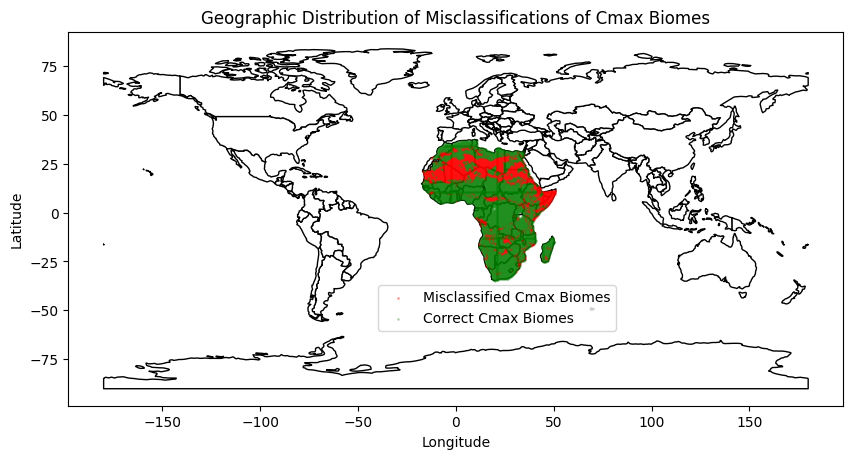

In [ ]:
# Identify misclassified samples in AFRICA OBS
misclassified_obs = region2_data[y_pred_test_obs_af != y_biome_obs_af]
correct_obs = region2_data[y_pred_test_obs_af == y_biome_obs_af]
acc1 = len(correct_obs)/(len(misclassified_obs)+len(correct_obs))

# AFRICA CMAX
misclassified_cmax = region2_data[y_pred_test_cmax_af != y_biome_cmax_af]
correct_cmax = region2_data[y_pred_test_cmax_af == y_biome_cmax_af]
acc2 = len(correct_cmax)/(len(misclassified_cmax)+len(correct_cmax))

## Plotting correct and incorrect classifications of OBS
# Convert misclassified samples to a GeoDataFrame
misclassified_geo = gpd.GeoDataFrame(
    misclassified_obs,
    geometry=gpd.points_from_xy(misclassified_obs['Lon'], misclassified_obs['Lat']),
    crs="EPSG:4326"
)
correct_geo = gpd.GeoDataFrame(
    correct_obs,
    geometry=gpd.points_from_xy(correct_obs['Lon'], correct_obs['Lat']),
    crs="EPSG:4326"
)
print(f"Accuracy = {round(acc1,3)}")
# Plot the world map and misclassified points
ax = world.plot(figsize=(10, 10), color='white', edgecolor='black')
# Plot misclassified points in red
misclassified_geo.plot(ax=ax, color='red', marker='o',markersize=1,alpha =0.3, label="Misclassified Obs. Biomes")
correct_geo.plot(ax=ax, color='green', marker='x',markersize=1, alpha =0.3, label="Correct Obs. Biomes")

# Add a title and legend
plt.title("Geographic Distribution of Misclassifications of Observed Biomes")
plt.legend(loc = (0.4,0.2))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Plotting correct and incorrect classifications of CMAX
# Convert misclassified samples to a GeoDataFrame
misclassified_geo = gpd.GeoDataFrame(
    misclassified_cmax,
    geometry=gpd.points_from_xy(misclassified_cmax['Lon'], misclassified_cmax['Lat']),
    crs="EPSG:4326"
)
correct_geo = gpd.GeoDataFrame(
    correct_cmax,
    geometry=gpd.points_from_xy(correct_cmax['Lon'], correct_cmax['Lat']),
    crs="EPSG:4326"
)
print(f"Accuracy = {round(acc2,3)}")
# Plot the world map and misclassified points
ax = world.plot(figsize=(10, 10), color='white', edgecolor='black')
# Plot misclassified points in red
misclassified_geo.plot(ax=ax, color='red', marker='o',markersize=1,alpha =0.3, label="Misclassified Cmax Biomes")
correct_geo.plot(ax=ax, color='green', marker='x',markersize=1, alpha =0.3, label="Correct Cmax Biomes")

# Add a title and legend
plt.title("Geographic Distribution of Misclassifications of Cmax Biomes")
plt.legend(loc = (0.4,0.2))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## **Testing models across intended scopes:**
Now, the model predicting biomes based on *observations*, is used to predict biomes based on *cmax* using the cmax data.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Performance of Model Trained on `Biome_obs` and Tested on `Biome_Cmax`
Accuracy: 0.12436048799685163

Classification Report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00      2057
           8       0.26      0.18      0.21      2508
           9       0.00      0.06      0.00        33
          10       0.94      0.23      0.36      3428
          11       0.00      0.00      0.00       888
          12       0.06      0.03      0.04      1006
          13       0.00      0.00      0.00       238
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0

    accuracy                           0.12     10164
   macro avg       0.10      0.04      0.05     10164
weighted

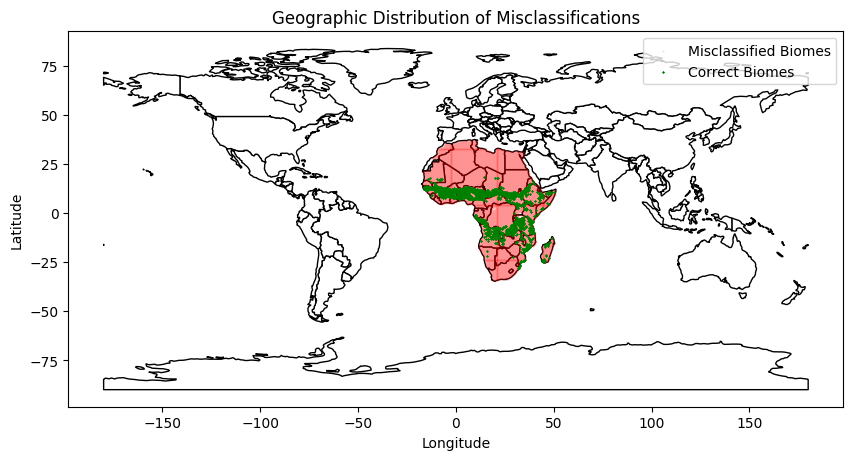

In [ ]:
# Predict `Biome_Cmax` using the model trained on `Biome_obs`
y_biome_cmax_pred_from_obs = final_am_model_obs.predict(X_af)

# Evaluate the performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_biome_cmax_from_obs = accuracy_score(y_biome_cmax_af, y_biome_cmax_pred_from_obs)
classification_rep_cmax_from_obs = classification_report(y_biome_cmax_af, y_biome_cmax_pred_from_obs)
conf_matrix_cmax_from_obs = confusion_matrix(y_biome_cmax_af, y_biome_cmax_pred_from_obs)

print("Performance of Model Trained on `Biome_obs` and Tested on `Biome_Cmax`")
print("Accuracy:", accuracy_biome_cmax_from_obs)
print("\nClassification Report:\n", classification_rep_cmax_from_obs)
print("\nConfusion Matrix:\n", conf_matrix_cmax_from_obs)

# Identify misclassified samples
misclassified = y_biome_cmax_af[y_biome_cmax_af != y_biome_cmax_pred_from_obs]
misclassified = pd.DataFrame(misclassified)
misclassified["Lon"] = selected_data["Lon"].astype(float)
misclassified["Lat"] = selected_data["Lat"].astype(float)
print(misclassified.head)
correct = y_biome_cmax_af[y_biome_cmax_af == y_biome_cmax_pred_from_obs]
correct = pd.DataFrame(correct)
correct["Lon"] = selected_data["Lon"].astype(float)
correct["Lat"] = selected_data["Lat"].astype(float)
print(misclassified.head)
print("Misclassified Samples:")
print(misclassified)

# Convert misclassified samples to a GeoDataFrame
misclassified_geo = gpd.GeoDataFrame(
    misclassified,
    geometry=gpd.points_from_xy(misclassified['Lon'], misclassified['Lat']),
    crs="EPSG:4326"
)
correct_geo = gpd.GeoDataFrame(
    correct,
    geometry=gpd.points_from_xy(correct['Lon'], correct['Lat']),
    crs="EPSG:4326"
)
# Plot the world map and misclassified points
ax = world.plot(figsize=(10, 10), color='white', edgecolor='black')
# Plot misclassified points in red
misclassified_geo.plot(ax=ax, color='red', marker='o',markersize=0.5,alpha =0.1, label="Misclassified Biomes")
correct_geo.plot(ax=ax, color='green', marker='x',markersize=0.5,  label="Correct Biomes")

# Add a title and legend
plt.title("Geographic Distribution of Misclassifications")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Now, the *cmax* model is tested by predicting the *obs* biomes using the boimes x data.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performance of Model Trained on `Biome_obs` and Tested on `Biome_Cmax`
Accuracy: 0.12436048799685163

Classification Report:
               precision    recall  f1-score   support

           5       0.83      0.83      0.83         6
           6       0.00      0.00      0.00        91
           7       0.00      1.00      0.00         3
           8       0.30      0.56      0.39      1206
           9       0.00      0.00      0.00      1388
          10       0.20      0.83      0.32      1087
          11       0.00      0.00      0.00       234
          12       0.00      0.00      0.00      1144
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00      1213
          15       0.00      0.00      0.00       676
          16       0.00      0.00      0.00      1031
          17       0.00      0.00      0.00      2080

    accuracy                           0.16     10164
   macro avg       0.10      0.25      0.12     10164
weighted

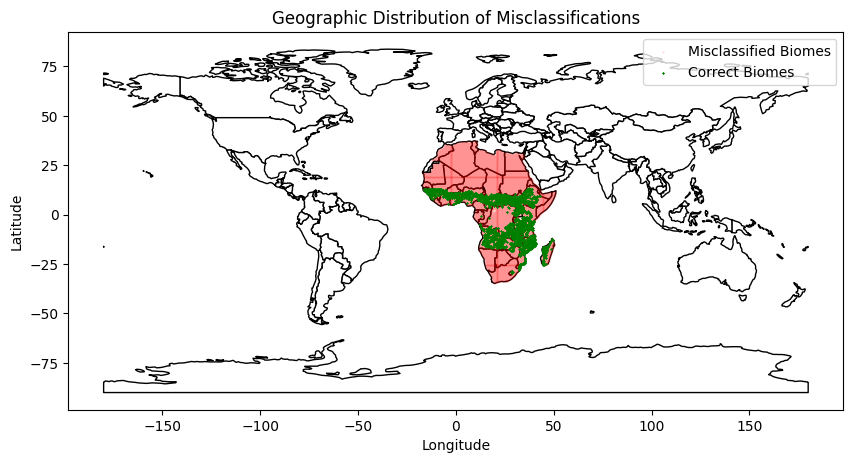

In [ ]:
# Predict `Biome_obs` using the model trained on `Biome_Cmax`
y_biome_obs_pred_from_cmax = final_am_model_cmax.predict(X_af)

# Evaluate the performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_biome_obs_pred_from_cmax = accuracy_score(y_biome_obs_af, y_biome_obs_pred_from_cmax)
classification_rep_obs_from_cmax = classification_report(y_biome_obs_af, y_biome_obs_pred_from_cmax)
conf_matrix_obs_from_cmax = confusion_matrix(y_biome_obs_af, y_biome_obs_pred_from_cmax)

print("Performance of Model Trained on `Biome_obs` and Tested on `Biome_Cmax`")
print("Accuracy:", accuracy_biome_cmax_from_obs)
print("\nClassification Report:\n", classification_rep_obs_from_cmax)
print("\nConfusion Matrix:\n", conf_matrix_obs_from_cmax )

# Identify misclassified samples
misclassified = y_biome_obs_af[y_biome_obs_af != y_biome_obs_pred_from_cmax]
misclassified = pd.DataFrame(misclassified)
misclassified["Lon"] = selected_data["Lon"].astype(float)
misclassified["Lat"] = selected_data["Lat"].astype(float)
print(misclassified.head)
correct = y_biome_obs_af[y_biome_obs_af == y_biome_obs_pred_from_cmax]
correct = pd.DataFrame(correct)
correct["Lon"] = selected_data["Lon"].astype(float)
correct["Lat"] = selected_data["Lat"].astype(float)
print(misclassified.head)
print("Misclassified Samples:")
print(misclassified)

# Convert misclassified samples to a GeoDataFrame
misclassified_geo = gpd.GeoDataFrame(
    misclassified,
    geometry=gpd.points_from_xy(misclassified['Lon'], misclassified['Lat']),
    crs="EPSG:4326"
)
correct_geo = gpd.GeoDataFrame(
    correct,
    geometry=gpd.points_from_xy(correct['Lon'], correct['Lat']),
    crs="EPSG:4326"
)
# Plot the world map and misclassified points
ax = world.plot(figsize=(10, 10), color='white', edgecolor='black')
# Plot misclassified points in red
misclassified_geo.plot(ax=ax, color='red', marker='o',markersize=0.5,alpha =0.1, label="Misclassified Biomes")
correct_geo.plot(ax=ax, color='green', marker='x',markersize=0.5,  label="Correct Biomes")

# Add a title and legend
plt.title("Geographic Distribution of Misclassifications")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Compare the Biome_obs from for prediction with the biome_obs in LPJ GUESS output

In [ ]:
# Load the LPJ-GUESS output file
lpj_guess_data = pd.read_csv('LPJ-GUESS_output_BERN1.csv')
# Merge LPJ-GUESS output data with machine learning test data using longitude and latitude
combined_data = X_af.copy()
combined_data['y_pred_test_obs_af'] = y_pred_test_obs_af  # Add machine learning predictions

# Merge with LPJ-GUESS data based on Lon and Lat
combined_data = combined_data.merge(lpj_guess_data[['Lon', 'Lat', 'Biome_obs']], on=['Lon', 'Lat'], how='inner')
print(combined_data.head())


   Unnamed: 0    Lon    Lat  clay  silt  sand   orgC  tmax_SpringMean  \
0       18634 -17.25  14.75  0.05  0.06  0.89  0.004           299.68   
1       18640 -16.75  21.25  0.13  0.19  0.68  0.006           295.93   
2       18641 -16.75  20.75  0.13  0.19  0.68  0.006           297.01   
3       18642 -16.75  15.25  0.05  0.05  0.90  0.003           301.31   
4       18643 -16.75  14.75  0.05  0.05  0.90  0.003           301.20   

   tmax_SpringMedian  tmax_SpringStd  ...  Pre_SummerMedian  Pre_SummerStd  \
0             299.73         0.51489  ...          0.008284       0.582890   
1             295.92         0.91033  ...          0.003308       0.061110   
2             297.10         0.85662  ...          0.003597       0.055859   
3             301.36         0.72744  ...          0.009628       0.475710   
4             301.20         1.05180  ...          0.007479       0.726270   

   Pre_FallMean  Pre_FallMedian  Pre_FallStd  Pre_WinterMean  \
0       5.14030        4.784

In [ ]:
# Compare ML predictions with LPJ-GUESS outputs - OBS
accuracy = accuracy_score(combined_data['Biome_obs'], combined_data['y_pred_test_obs_af'])
conf_matrix = confusion_matrix(combined_data['Biome_obs'], combined_data['y_pred_test_obs_af'])
classification_rep = classification_report(combined_data['Biome_obs'], combined_data['y_pred_test_obs_af'])
print("Comparison of Biome_obs between Machine Learning Model and LPJ-GUESS Output:")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Comparison of Biome_obs between Machine Learning Model and LPJ-GUESS Output:
Accuracy: 0.3482880755608028

Classification Report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       0.35      0.81      0.49        91
           7       0.00      0.00      0.00         3
           8       0.47      0.66      0.55      1206
           9       0.84      0.88      0.86      1388
          10       0.47      0.36      0.41      1087
          11       0.04      0.29      0.06       234
          12       0.47      0.24      0.32      1144
          13       0.00      0.00      0.00         5
          14       0.20      0.23      0.21      1213
          15       0.35      0.22      0.27       676
          16       0.16      0.27      0.20      1031
          17       0.79      0.01      0.01      2080

    accuracy                           0.35     10164
   macro avg       0.32      0.30      0.26     10164
wei

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


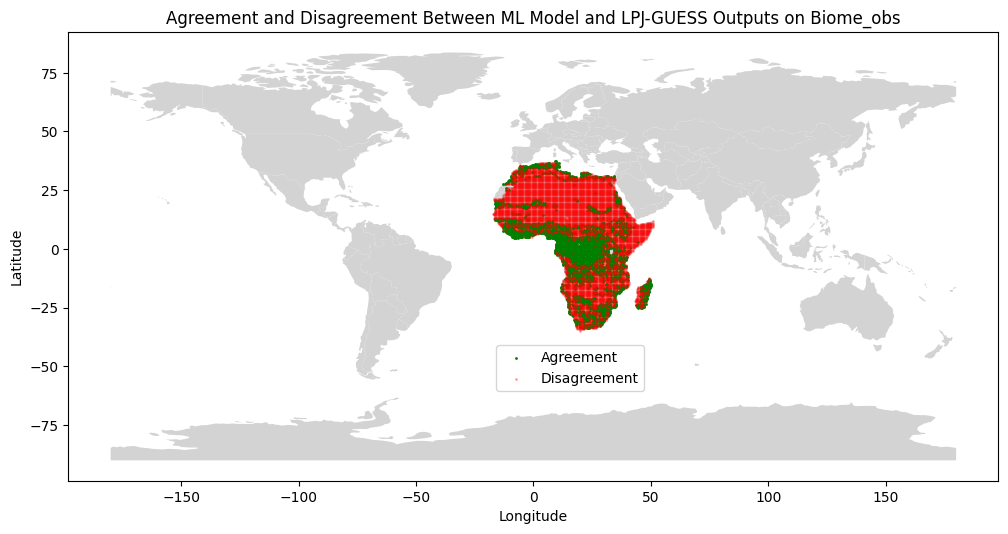

In [ ]:
# Identify agreement and disagreement
combined_data['Agreement'] = combined_data['y_pred_test_obs_af'] == combined_data['Biome_obs']
agreement = combined_data[combined_data['Agreement'] == True]
disagreement = combined_data[combined_data['Agreement'] == False]

# Convert to GeoDataFrames for plotting
agreement_gdf = gpd.GeoDataFrame(agreement, geometry=gpd.points_from_xy(agreement['Lon'], agreement['Lat']), crs="EPSG:4326")
disagreement_gdf = gpd.GeoDataFrame(disagreement, geometry=gpd.points_from_xy(disagreement['Lon'], disagreement['Lat']), crs="EPSG:4326")

# Plot the map
world = gpd.read_file(url)
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgrey')

agreement_gdf.plot(ax=ax, color='green', markersize=1, label="Agreement")
disagreement_gdf.plot(ax=ax, color='red', markersize=1, alpha =0.3,  label="Disagreement")

plt.legend(loc=(0.46, 0.2))
plt.title("Agreement and Disagreement Between ML Model and LPJ-GUESS Outputs on Biome_obs")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Compare the Cmax from for prediction with the Cmax in LPJ GUESS output

In [ ]:
# Merge LPJ-GUESS output data with machine learning test data using longitude and latitude
combined_data = X_af.copy()
combined_data['y_pred_test_cmax_af'] = y_pred_test_cmax_af  # Add machine learning predictions on Cmax

# Merge with LPJ-GUESS data based on Lon and Lat
combined_data_cmax = combined_data.merge(lpj_guess_data[['Lon', 'Lat', 'Biome_Cmax']], on=['Lon', 'Lat'], how='inner')
print(combined_data_cmax.head())


   Unnamed: 0    Lon    Lat  clay  silt  sand   orgC  tmax_SpringMean  \
0       18634 -17.25  14.75  0.05  0.06  0.89  0.004           299.68   
1       18640 -16.75  21.25  0.13  0.19  0.68  0.006           295.93   
2       18641 -16.75  20.75  0.13  0.19  0.68  0.006           297.01   
3       18642 -16.75  15.25  0.05  0.05  0.90  0.003           301.31   
4       18643 -16.75  14.75  0.05  0.05  0.90  0.003           301.20   

   tmax_SpringMedian  tmax_SpringStd  ...  Pre_SummerMedian  Pre_SummerStd  \
0             299.73         0.51489  ...          0.008284       0.582890   
1             295.92         0.91033  ...          0.003308       0.061110   
2             297.10         0.85662  ...          0.003597       0.055859   
3             301.36         0.72744  ...          0.009628       0.475710   
4             301.20         1.05180  ...          0.007479       0.726270   

   Pre_FallMean  Pre_FallMedian  Pre_FallStd  Pre_WinterMean  \
0       5.14030        4.784

In [ ]:
# Compare ML predictions with LPJ-GUESS outputs - CMAX
accuracy_cmax = accuracy_score(combined_data_cmax['Biome_Cmax'], combined_data_cmax['y_pred_test_cmax_af'])
conf_matrix_cmax = confusion_matrix(combined_data_cmax['Biome_Cmax'], combined_data_cmax['y_pred_test_cmax_af'])
classification_rep_cmax = classification_report(combined_data_cmax['Biome_Cmax'], combined_data_cmax['y_pred_test_cmax_af'])
print("Comparison of Cmax between Machine Learning Model and LPJ-GUESS Output:")
print("Accuracy:", accuracy_cmax)
print("\nClassification Report:\n", classification_rep_cmax)
print("\nConfusion Matrix:\n", conf_matrix_cmax)

Comparison of Cmax between Machine Learning Model and LPJ-GUESS Output:
Accuracy: 0.6590909090909091

Classification Report:
               precision    recall  f1-score   support

           5       0.83      0.83      0.83         6
           7       0.66      0.96      0.78      2057
           8       0.75      0.69      0.72      2508
           9       0.00      0.00      0.00        33
          10       0.63      0.84      0.72      3428
          11       1.00      0.00      0.00       888
          12       0.35      0.12      0.17      1006
          13       0.00      0.00      0.00       238

    accuracy                           0.66     10164
   macro avg       0.53      0.43      0.40     10164
weighted avg       0.66      0.66      0.60     10164


Confusion Matrix:
 [[   5    1    0    0    0    0    0    0]
 [   1 1976   51    0   23    0    6    0]
 [   0   57 1723    0  693    0   35    0]
 [   0    7    5    0   20    0    1    0]
 [   0   50  502    0 2876    0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


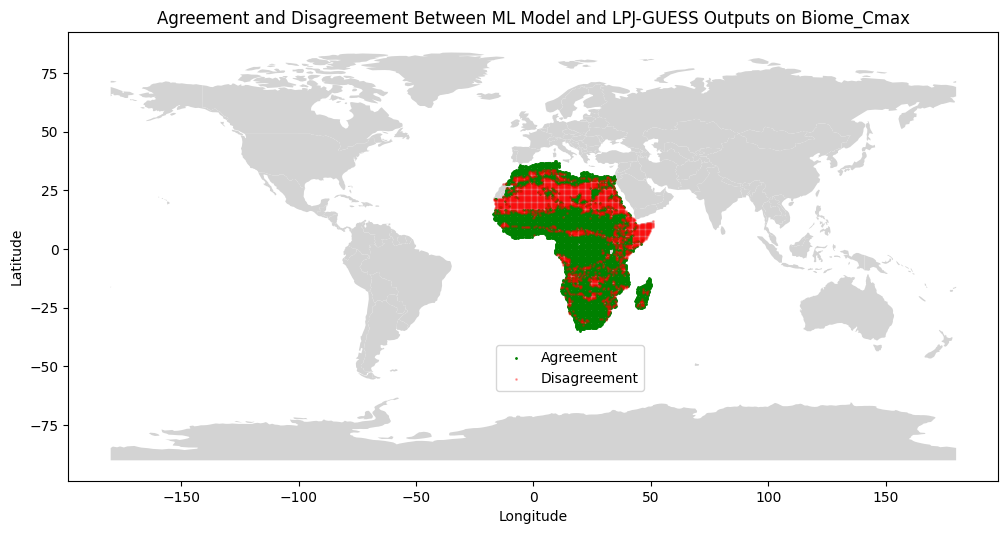

In [ ]:
# Identify agreement and disagreement
combined_data_cmax['Agreement'] = combined_data_cmax['y_pred_test_cmax_af'] == combined_data_cmax['Biome_Cmax']
agreement = combined_data_cmax[combined_data_cmax['Agreement'] == True]
disagreement = combined_data_cmax[combined_data_cmax['Agreement'] == False]

# Convert to GeoDataFrames for plotting
agreement_gdf = gpd.GeoDataFrame(agreement, geometry=gpd.points_from_xy(agreement['Lon'], agreement['Lat']), crs="EPSG:4326")
disagreement_gdf = gpd.GeoDataFrame(disagreement, geometry=gpd.points_from_xy(disagreement['Lon'], disagreement['Lat']), crs="EPSG:4326")

# Plot the map
world = gpd.read_file(url)
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgrey')

agreement_gdf.plot(ax=ax, color='green', markersize=1, label="Agreement")
disagreement_gdf.plot(ax=ax, color='red', markersize=1,alpha =0.3, label="Disagreement")

plt.legend(loc=(0.46, 0.2))
plt.title("Agreement and Disagreement Between ML Model and LPJ-GUESS Outputs on Biome_Cmax")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# **5. Regression**

In [ ]:
# Load the dataset
data = pd.read_csv('data_index_2.csv')

# Define features and targets for the two models
X = data.drop([
    'CN', 'pH', 'cellfraction', 'NPP', 'SoilR', 'MaxBiomeCmax', 'MaxBiomeLAI',
    'VegC', 'LitterC', 'SoilC', 'Biome_Cmax', 'Biome_LAI', 'Biome_obs',
    'GFED-region', 'Pan_2007', 'ISO3', 'UN'
], axis=1, errors='ignore')
y_npp = data['NPP']  # Target for NPP model
y_vegc = data['VegC']  # Target for VegC model

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_npp_train, y_npp_test = train_test_split(X, y_npp, test_size=0.2, random_state=42)
_, _, y_vegc_train, y_vegc_test = train_test_split(X, y_vegc, test_size=0.2, random_state=42)

In [ ]:
X.columns

Index(['Unnamed: 0', 'Lon', 'Lat', 'clay', 'silt', 'sand', 'orgC',
       'tmax_SpringMean', 'tmax_SpringMedian', 'tmax_SpringStd',
       'tmax_SummerMean', 'tmax_SummerMedian', 'tmax_SummerStd',
       'tmax_FallMean', 'tmax_FallMedian', 'tmax_FallStd', 'tmax_WinterMean',
       'tmax_WinterMedian', 'tmax_WinterStd', 'tswrf_SpringMean',
       'tswrf_SpringMedian', 'tswrf_SpringStd', 'tswrf_SummerMean',
       'tswrf_SummerMedian', 'tswrf_SummerStd', 'tswrf_FallMean',
       'tswrf_FallMedian', 'tswrf_FallStd', 'tswrf_WinterMean',
       'tswrf_WinterMedian', 'tswrf_WinterStd', 'tmin_SpringMean',
       'tmin_SpringMedian', 'tmin_SpringStd', 'tmin_SummerMean',
       'tmin_SummerMedian', 'tmin_SummerStd', 'tmin_FallMean',
       'tmin_FallMedian', 'tmin_FallStd', 'tmin_WinterMean',
       'tmin_WinterMedian', 'tmin_WinterStd', 'tmp_SpringMean',
       'tmp_SpringMedian', 'tmp_SpringStd', 'tmp_SummerMean',
       'tmp_SummerMedian', 'tmp_SummerStd', 'tmp_FallMean', 'tmp_FallMedian',
 

In [ ]:
# Define cross-validation strategy
kfold = KFold(n_splits=3, random_state=1, shuffle=True)

# Model and evaluation for NPP
reg_npp = RandomForestRegressor(random_state=42)
reg_npp.fit(X_train, y_npp_train)

# Evaluate on training data
score_npp_train = reg_npp.score(X_train, y_npp_train)
print('R^2 of RandomForestRegressor on NPP train data: {:.4f}'.format(score_npp_train))

# Cross-validation scores on training data
scores_npp_val = cross_val_score(reg_npp, X_train, y_npp_train, cv=kfold, scoring='neg_mean_squared_error')
print("Cross-validation MSE for NPP: %0.4f (±%0.4f)" % (np.mean(-scores_npp_val), np.std(-scores_npp_val)))

# Evaluate on test data
score_npp_test = reg_npp.score(X_test, y_npp_test)
mse_npp_test = mean_squared_error(y_npp_test, reg_npp.predict(X_test))
print('R^2 of RandomForestRegressor on NPP test data: {:.4f}'.format(score_npp_test))
print("MSE of RandomForestRegressor on NPP test data: {:.4f}".format(mse_npp_test))
# Save the model to a file
#joblib.dump(reg_npp, 'random_forest_regression_model_npp.joblib')

KeyboardInterrupt: 

In [ ]:
plt.plot(y_npp_test)
plt.plot(reg_npp.predict(X_test))
plt.show()

In [ ]:
# Plot predicted vs actual values
y_npp_pred = reg_npp.predict(X_test)
plt.figure(figsize=(8, 8))
plt.scatter(y_npp_pred, y_npp_test, alpha=0.5, color='blue', s = 5)
plt.plot([y_npp_test.min(), y_npp_test.max()], [y_npp_test.min(), y_npp_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual NPP')
plt.xlabel('Predicted NPP')
plt.ylabel('Actual NPP')
plt.show()

In [ ]:
# Extract feature importances
feature_importances = reg_npp.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 16))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.title('Feature Importance in Random Forest Regressor for NPP')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Sort features by importance and get the top 10
top_10_features_df_NPP = importance_df.sort_values(by='Importance', ascending=False).head(10)
# Plot feature importance - STILL MANY PREDICTORS!
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features_df_NPP)
plt.title('Top 10 Feature Importance in Random Forest - Predicted African OBSERVED BIOMES')
plt.show()

In [ ]:
# Define cross-validation strategy
kfold = KFold(n_splits=3, random_state=1, shuffle=True)
# Model and evaluation for VegC
reg_vegc = RandomForestRegressor(random_state=42)
reg_vegc.fit(X_train, y_vegc_train)

# Evaluate on training data
score_vegc_train = reg_vegc.score(X_train, y_vegc_train)
print('R^2 of RandomForestRegressor on VegC train data: {:.4f}'.format(score_vegc_train))

# Cross-validation scores on training data
scores_vegc_val = cross_val_score(reg_vegc, X_train, y_vegc_train, cv=kfold, scoring='neg_mean_squared_error')
print("Cross-validation MSE for VegC: %0.4f (±%0.4f)" % (np.mean(-scores_vegc_val), np.std(-scores_vegc_val)))

# Evaluate on test data
score_vegc_test = reg_vegc.score(X_test, y_vegc_test)
mse_vegc_test = mean_squared_error(y_vegc_test, reg_vegc.predict(X_test))
print('R^2 of RandomForestRegressor on VegC test data: {:.4f}'.format(score_vegc_test))
print("MSE of RandomForestRegressor on VegC test data: {:.4f}".format(mse_vegc_test))

# Save the model to a file
joblib.dump(reg_vegc, 'random_forest_regression_model_vegc.joblib')

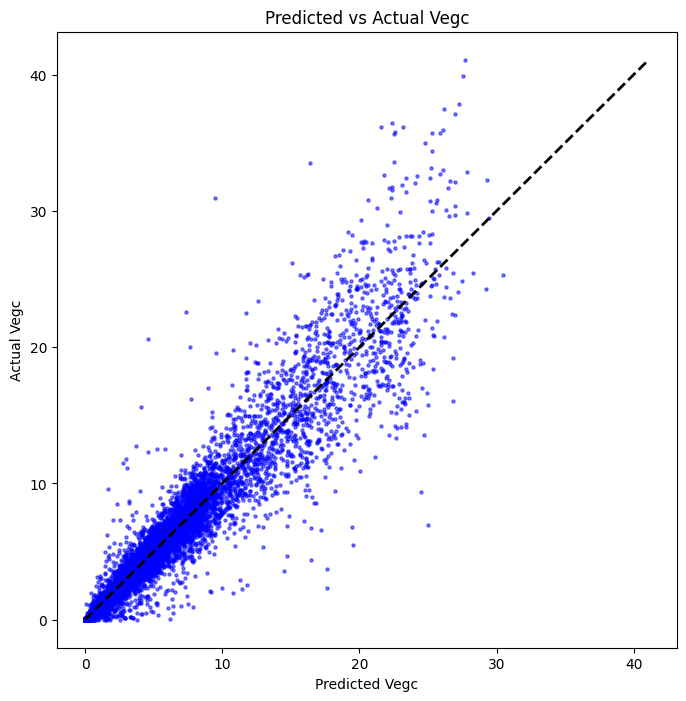

In [ ]:
# Plot predicted vs actual values
y_vegc_pred = reg_vegc.predict(X_test)
plt.figure(figsize=(8, 8))
plt.scatter(y_vegc_pred, y_vegc_test, alpha=0.5, color='blue', s = 5)
plt.plot([y_vegc_test.min(), y_vegc_test.max()], [y_vegc_test.min(), y_vegc_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Vegc')
plt.xlabel('Predicted Vegc')
plt.ylabel('Actual Vegc')
plt.show()

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Save to Google Drive
#joblib.dump(reg_vegc, '/content/drive/MyDrive/random_forest_regression_model_vegc.joblib')
#joblib.dump(reg_npp, '/content/drive/MyDrive/random_forest_regression_model_npp.joblib')

# Load from Google Drive
##reg_vegc = joblib.load('/content/drive/MyDrive/random_forest_regression_model_vegc.joblib')
reg_npp = joblib.load('random_forest_regression_model_npp.joblib')

ValueError: EOF: reading array data, expected 262144 bytes got 213568

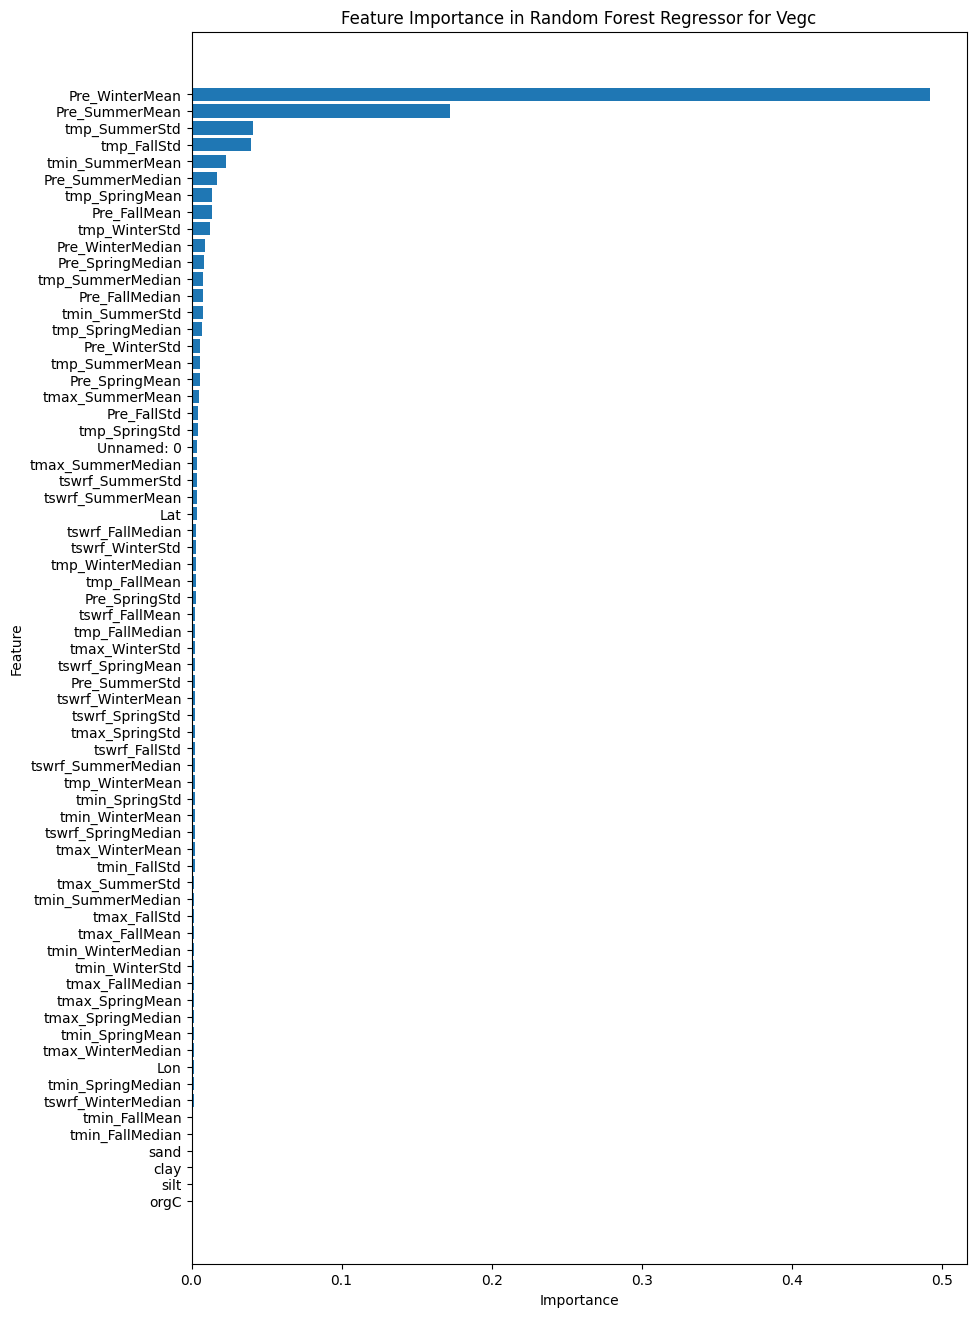

In [ ]:
# Extract feature importances
feature_importances = reg_vegc.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 16))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.title('Feature Importance in Random Forest Regressor for Vegc')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

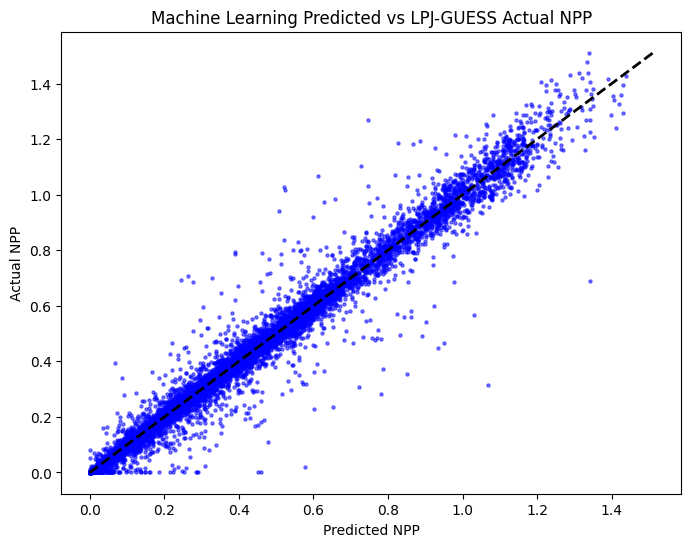

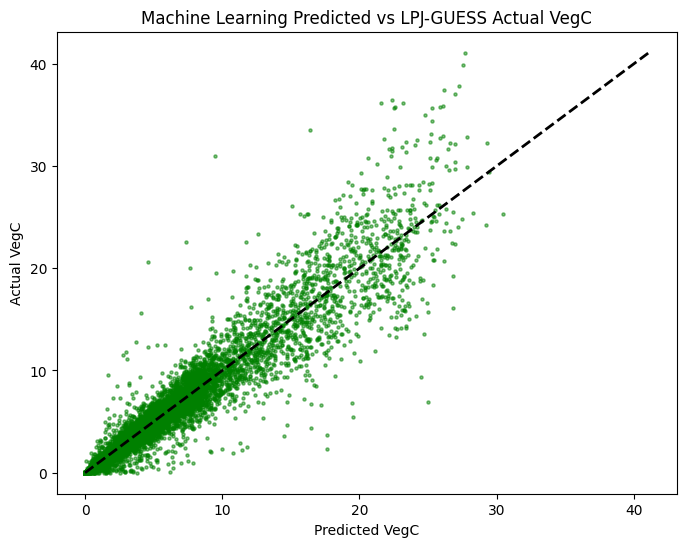

In [ ]:
# Load the LPJ-GUESS output file
lpj_guess_data = pd.read_csv('LPJ-GUESS_output_BERN1.csv')

y_npp_pred = reg_npp.predict(X_test)
y_vegc_pred = reg_vegc.predict(X_test)


# Add predictions to LPJ-GUESS data for comparison
predictions_df = X_test[['Lon', 'Lat']].copy()
predictions_df['y_npp_pred'] = y_npp_pred
predictions_df['y_vegc_pred'] = y_vegc_pred

merged_data = predictions_df.merge(lpj_guess_data[['Lon', 'Lat', 'NPP', 'VegC']], on=['Lon', 'Lat'], how='inner')

# Plot predictions vs actual values for NPP
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['y_npp_pred'], merged_data['NPP'], alpha=0.5, color='blue', s = 5)
plt.plot([merged_data['NPP'].min(), merged_data['NPP'].max()],
         [merged_data['NPP'].min(), merged_data['NPP'].max()], 'k--', lw=2)
plt.xlabel('Predicted NPP')
plt.ylabel('Actual NPP')
plt.title('Machine Learning Predicted vs LPJ-GUESS Actual NPP')
plt.show()

# Plot predictions vs actual values for VegC
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['y_vegc_pred'], merged_data['VegC'], alpha=0.5, color='green', s = 5)
plt.plot([merged_data['VegC'].min(), merged_data['VegC'].max()],
         [merged_data['VegC'].min(), merged_data['VegC'].max()], 'k--', lw=2)
plt.xlabel('Predicted VegC')
plt.ylabel('Actual VegC')
plt.title('Machine Learning Predicted vs LPJ-GUESS Actual VegC')
plt.show()

Agreement Rate after Rounding: 26.06%
Agreement Rate after Rounding: 26.06%


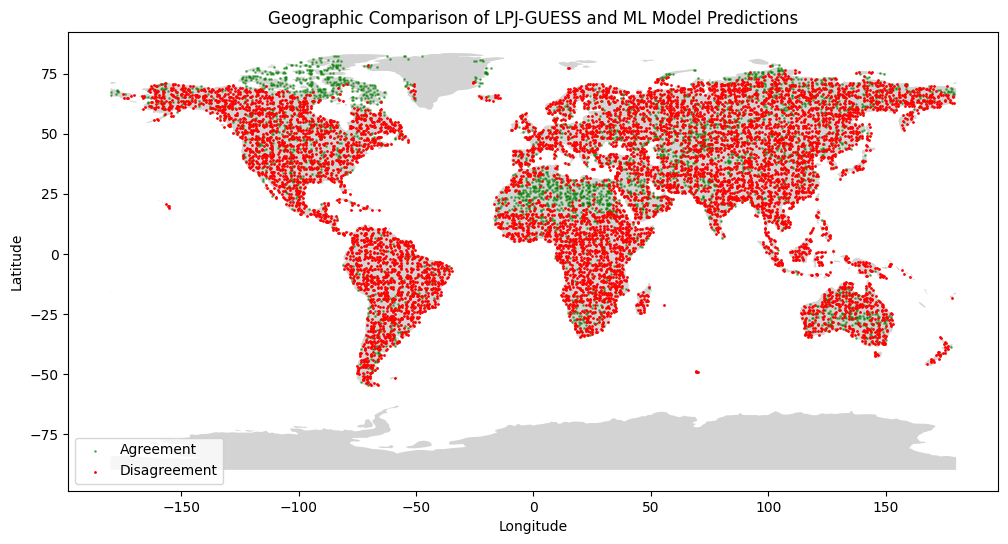

In [ ]:
# Define a tolerance level for agreement
#tolerance = 0.04
round_decimals = 3

# Round both LPJ-GUESS and ML predictions for comparison
merged_data['NPP'] = merged_data['NPP'].round(round_decimals)
merged_data['y_npp_pred'] = merged_data['y_npp_pred'].round(round_decimals)
# Recalculate Agreement based on rounded values
merged_data['Agreement'] = merged_data['NPP'] == merged_data['y_npp_pred']
# Check agreement summary
agreement_rate = merged_data['Agreement'].mean()
print(f"Agreement Rate after Rounding: {agreement_rate * 100:.2f}%")

# Check agreement summary
agreement_rate = merged_data['Agreement'].mean()
print(f"Agreement Rate after Rounding: {agreement_rate * 100:.2f}%")
# Calculate Agreement based on tolerance level
#merged_data['Agreement'] = abs(merged_data['NPP'] - merged_data['y_npp_pred']) <= tolerance

# Separate rows where LPJ-GUESS and ML predictions agree or disagree
agreement = merged_data[merged_data['Agreement'] == True]
disagreement = merged_data[merged_data['Agreement'] == False]

# Convert to GeoDataFrame for mapping
gdf_agreement = gpd.GeoDataFrame(agreement, geometry=gpd.points_from_xy(agreement['Lon'], agreement['Lat']), crs="EPSG:4326")
gdf_disagreement = gpd.GeoDataFrame(disagreement, geometry=gpd.points_from_xy(disagreement['Lon'], disagreement['Lat']), crs="EPSG:4326")

# Load a world map for geographic reference
world = gpd.read_file(url)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgrey')

# Plot points of agreement in green and disagreement in red
gdf_agreement.plot(ax=ax, color='green', markersize=1,alpha = 0.5, label='Agreement')
gdf_disagreement.plot(ax=ax, color='red', markersize=1, label='Disagreement')

plt.legend()
plt.title("Geographic Comparison of LPJ-GUESS and ML Model Predictions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

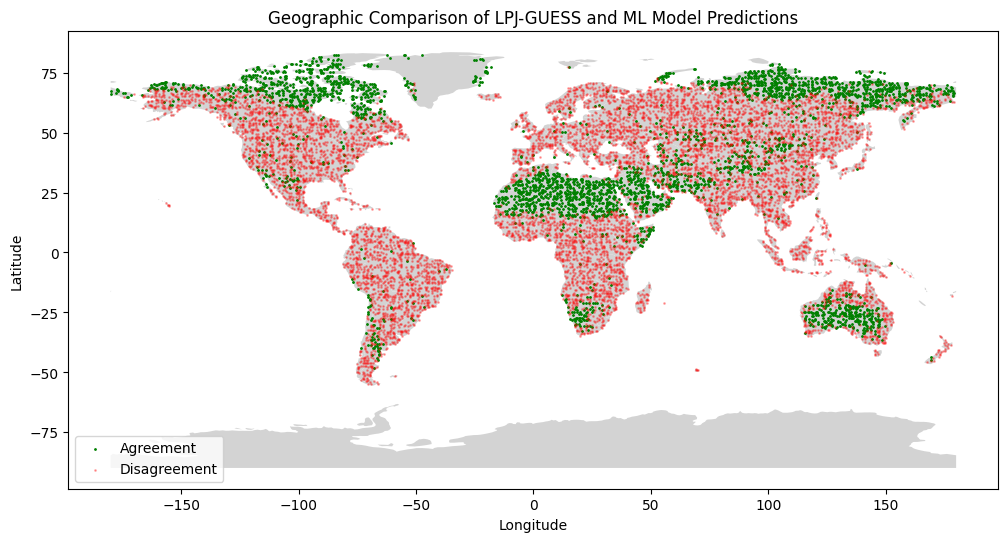

In [ ]:
# Define a tolerance level for agreement
tolerance = 0.04

# Calculate Agreement based on tolerance level
merged_data['Agreement'] = abs(merged_data['VegC'] - merged_data['y_vegc_pred']) <= tolerance


# Separate rows where LPJ-GUESS and ML predictions agree or disagree
agreement = merged_data[merged_data['Agreement'] == True]
disagreement = merged_data[merged_data['Agreement'] == False]

# Convert to GeoDataFrame for mapping
gdf_agreement = gpd.GeoDataFrame(agreement, geometry=gpd.points_from_xy(agreement['Lon'], agreement['Lat']), crs="EPSG:4326")
gdf_disagreement = gpd.GeoDataFrame(disagreement, geometry=gpd.points_from_xy(disagreement['Lon'], disagreement['Lat']), crs="EPSG:4326")

# Load a world map for geographic reference
world = gpd.read_file(url)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgrey')

# Plot points of agreement in green and disagreement in red
gdf_agreement.plot(ax=ax, color='green', markersize=1, label='Agreement')
gdf_disagreement.plot(ax=ax, color='red', markersize=1,alpha = 0.3, label='Disagreement')

plt.legend()
plt.title("Geographic Comparison of LPJ-GUESS and ML Model Predictions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()